<a href="https://colab.research.google.com/github/gkianfar/TIHM-Dataset-Visualization/blob/main/tihm_featureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone Github repo and set working directory path**

In [2]:
!git clone https://github.com/gkianfar/TIHM-Dataset-Visualization

fatal: destination path 'TIHM-Dataset-Visualization' already exists and is not an empty directory.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load packages**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from matplotlib import cm
import matplotlib.patches as mpatches
from collections.abc import Iterable
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
## Set colour palette
ibm_colorblind = ['#648FFF', '#FE6100', '#DC267F', '#785EF0', '#FFB000','#48A9A6']
sns.set_palette(ibm_colorblind)

**Functions**

In [5]:
def correct_col_type(df,col):
    raw_type = str(type(df[col].dtype)).split('.')[-1].split('\'')[0].lower()
    #print(col,raw_type)
    if 'object' in raw_type:
        if 'date' in col or 'timestamp' in col or 'datetime' in col:
            return pd.to_datetime(df[col])
        else:
            return df[col].astype('category')
    else:
        return df[col]


def gen_date_col(df, tcol):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df[tcol].dt.date
    return df





**Set Data and Fig folders paths**

In [7]:
## Please change the path with the path of your dataset
%cd /content/TIHM-Dataset-Visualization
DPATH = './Data'
SAVE_PATH = './Figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)



/content/TIHM-Dataset-Visualization


**Import Files**

In [9]:
### Labels
f = 'Labels.csv'
fpth = os.path.join(DPATH,f)
labels_df = pd.read_csv(fpth)
for col in labels_df.columns:
    labels_df[col] = correct_col_type(labels_df,col)
if 'date' in labels_df.columns:
    labels_df = labels_df.rename(columns={'date':'timestamp'})
    labels_df['timestamp'] = pd.to_datetime(labels_df['timestamp'])
    labels_df['date'] = labels_df['timestamp'].dt.date
    labels_df['time'] = labels_df['timestamp'].dt.time

if 'type' in labels_df.columns:
    labels_df = labels_df.rename(columns={'type':'label'})

In [10]:
### Activity

f = 'Activity.csv'
fpth = os.path.join(DPATH,f)
df = pd.read_csv(fpth)
for col in df.columns:
    df[col] = correct_col_type(df,col)
if 'date' in df.columns:
    activity_df = df.rename(columns={'date':'timestamp'})
    activity_df['timestamp'] = pd.to_datetime(activity_df['timestamp'])
    activity_df['date'] = activity_df['timestamp'].dt.date
    activity_df['time'] = activity_df['timestamp'].dt.time


activity_patients = np.unique(activity_df['patient_id'])

In [11]:
### Physiology
f = 'Physiology.csv'
fpth = os.path.join(DPATH,f)
df = pd.read_csv(fpth)
for col in df.columns:
    df[col] = correct_col_type(df,col)
if 'date' in df.columns:
    physiology_df = df.rename(columns={'date':'timestamp'})
    physiology_df['timestamp'] = pd.to_datetime(physiology_df['timestamp'])
    physiology_df['date'] = physiology_df['timestamp'].dt.date
    physiology_df['time'] = physiology_df['timestamp'].dt.time

#physiology_df = gen_date_col(df,tcol='timestamp')

physiology_patients = np.unique(physiology_df['patient_id'])
physiology_parameters = np.unique(df['device_type'])

In [12]:
# Sleep
f = 'Sleep.csv'
fpth = os.path.join(DPATH,f)
df = pd.read_csv(fpth)
for col in df.columns:
    df[col] = correct_col_type(df,col)
if 'date' in df.columns:
    sleep_df = df.rename(columns={'date':'timestamp'})
    sleep_df['timestamp'] = pd.to_datetime(sleep_df['timestamp'])
    sleep_df['date'] = sleep_df['timestamp'].dt.date
    sleep_df['time'] = sleep_df['timestamp'].dt.time

#physiology_df = gen_date_col(df,tcol='timestamp')

sleep_patients = np.unique(sleep_df['patient_id'])

In [13]:
f = 'Demographics.csv'
fpth = os.path.join(DPATH,f)
demographics_df = pd.read_csv(fpth)
for col in demographics_df.columns:
    demographics_df[col] = correct_col_type(demographics_df,col)

Data Cleaning

In [19]:

def gen_date_col(df, tcol):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df[tcol].dt.date
    return df


def load_datasets(DPATH):

    ### Labels
    f = 'Labels.csv'
    fpth = os.path.join(DPATH,f)
    labels_df = pd.read_csv(fpth)
    for col in labels_df.columns:
        labels_df[col] = correct_col_type(labels_df,col)
    if 'date' in labels_df.columns:
        labels_df = labels_df.rename(columns={'date':'timestamp'})
        labels_df['timestamp'] = pd.to_datetime(labels_df['timestamp'])
        labels_df['date'] = labels_df['timestamp'].dt.date
        labels_df['time'] = labels_df['timestamp'].dt.time

    if 'type' in labels_df.columns:
        labels_df = labels_df.rename(columns={'type':'label'})

    ### Activity
    f = 'Activity.csv'
    fpth = os.path.join(DPATH,f)
    df = pd.read_csv(fpth)
    for col in df.columns:
        df[col] = correct_col_type(df,col)
    if 'date' in df.columns:
        activity_df = df.rename(columns={'date':'timestamp'})
        activity_df['timestamp'] = pd.to_datetime(activity_df['timestamp'])
        activity_df['date'] = activity_df['timestamp'].dt.date
        activity_df['time'] = activity_df['timestamp'].dt.time


    ### Physiology
    f = 'Physiology.csv'
    fpth = os.path.join(DPATH,f)
    df = pd.read_csv(fpth)
    for col in df.columns:
        df[col] = correct_col_type(df,col)
    if 'date' in df.columns:
        physiology_df = df.rename(columns={'date':'timestamp'})
        physiology_df['timestamp'] = pd.to_datetime(physiology_df['timestamp'])
        physiology_df['date'] = physiology_df['timestamp'].dt.date
        physiology_df['time'] = physiology_df['timestamp'].dt.time

    # Sleep
    f = 'Sleep.csv'
    fpth = os.path.join(DPATH,f)
    df = pd.read_csv(fpth)
    for col in df.columns:
        df[col] = correct_col_type(df,col)
    if 'date' in df.columns:
        sleep_df = df.rename(columns={'date':'timestamp'})
        sleep_df['timestamp'] = pd.to_datetime(sleep_df['timestamp'])
        sleep_df['date'] = sleep_df['timestamp'].dt.date
        sleep_df['time'] = sleep_df['timestamp'].dt.time

    # Demographics dataset
    f = 'Demographics.csv'
    fpth = os.path.join(DPATH,f)
    demographics_df = pd.read_csv(fpth)
    for col in demographics_df.columns:
        demographics_df[col] = correct_col_type(demographics_df,col)

    return activity_df, physiology_df, sleep_df, sleep_df, demographics_df



def get_transition_matrix(activity_df, make_reciprocal=False):
    patients = activity_df['patient_id'].unique()
    states = activity_df['location_name'].unique().tolist()
    n_state = len(states)
    transition_matrix = {}

    state_map = dict(zip(states, range(n_state)))
    state_map_reverse = {v:k for k, v in state_map.items()}

    activity_df['location_name'] = activity_df['location_name'].copy().map(state_map)



    for p in patients:
        transition_matrix[p] = np.zeros((n_state, n_state))
        days = activity_df['date'][activity_df['patient_id'] == p].unique()
        days = np.sort(days)
        flag = True

        for i, d in enumerate(days):
            df = activity_df[(activity_df['patient_id'] == p) & (activity_df['date'] == d)]
            sequence = df['location_name'].tolist()
            timestamp = df['timestamp'].tolist()
            if not sequence:
                continue

            if flag:
                init_state = sequence[0]
                init_time = timestamp[0]

            for s, t in zip(sequence[1:], timestamp[1:]):

                transition_matrix[p][init_state][s] += 1
                init_state = s
                init_time = t


            if i != len(days) - 1:
                if (days[i+1] - d).days == 1:
                    flag = False
                else:
                    flag = True

    for p in patients:
        for i in range(n_state):
            row_sum = np.sum(transition_matrix[p][i, :])
            if row_sum != 0:
                transition_matrix[p][i, :] /= row_sum
    # Make the matrices reciprocal
    if make_reciprocal:
      for p in patients:
          transition_matrix[p] = np.minimum(transition_matrix[p], transition_matrix[p].T)
          transition_matrix[p] = transition_matrix[p] / np.sum(transition_matrix[p], axis=1, keepdims=True)

    return transition_matrix, state_map_reverse

def get_impossible_count(activity_df,transition_matrix,threshold,occurence_threshold):
  patients = activity_df['patient_id'].unique()

  impossible_activity_count = {}

  for p in patients:

      impossible_activity_count[p] = []

      patient_matrix = transition_matrix[p]  # Extract patient's transition matrix
      indices = np.where((patient_matrix < threshold))  # Find indices

      patient_impossible_transitions = list(zip(*indices))
      days = activity_df['date'][activity_df['patient_id'] == p].unique()
      days = np.sort(days)

      for i, d in enumerate(days):
          counter = 0
          df = activity_df[(activity_df['patient_id'] == p) & (activity_df['date'] == d)]
          sequence = df['location_name'].tolist()
          timestamp = df['timestamp'].tolist()
          if not sequence:
              continue

          for s, t in zip(sequence[1:], timestamp[1:]):

              init_state = s
              init_time = t
              if (init_state,s) in patient_impossible_transitions:
                counter+=1
          if counter>occurence_threshold:
            impossible_activity_count[p].append((d,counter))
      if not impossible_activity_count[p]:
        del impossible_activity_count[p]
  return impossible_activity_count
activity_df, physiology_df, sleep_df, sleep_df, demographics_df = load_datasets(DPATH)

activity_df = activity_df.drop_duplicates()
physiology_df = physiology_df.drop_duplicates()
sleep_df = sleep_df.drop_duplicates()

# Removing simultaneous activities by a patient
clean_option = 'remove_day' # last, 'remove_all'
use_transition_matrix = True
make_reciprocal = True
threshold = 0.03  # values lower than this will be considered as impossible transition
occurence_threshold = 0  # the minimum value of occurence for each day to be droped

from datetime import datetime

if clean_option == 'remove_day':
  duplicate_days = activity_df[['date','patient_id']][~activity_df.duplicated(subset=['patient_id', 'timestamp'], keep='first')]
  patients = duplicate_days['patient_id'].unique()
  dates = duplicate_days['date']
  for p, d in zip(patients,dates):
    activity_df = activity_df.drop(activity_df[(activity_df['patient_id']==p) & (activity_df['date']==d)].index)
    activity_df.reset_index(drop=True, inplace=True)

    labels_df = labels_df.drop(labels_df[(sleep_df['patient_id']==p) & (labels_df['date']==d)].index)
    labels_df.reset_index(drop=True, inplace=True)

  if use_transition_matrix:
    current_time = datetime.now().time()  # Time only (HH:MM:SS.microseconds)
    print(f'transition matrix start: {current_time}')
    transition_matrix, state_map_reverse = get_transition_matrix(activity_df,make_reciprocal)
    current_time = datetime.now().time()  # Time only (HH:MM:SS.microseconds)
    print(f'transition matrix end and impossible block start: {current_time}')
    impossible_activity_count = get_impossible_count(activity_df,transition_matrix,threshold,occurence_threshold)
    current_time = datetime.now().time()  # Time only (HH:MM:SS.microseconds)
    print(f'drop loop start start: {current_time}')
    for k, v in impossible_activity_count.items():
      days_with_visitor, _ = zip(*v)
      activity_df.drop(activity_df[(activity_df['patient_id']==k) & (activity_df['date'].isin(days_with_visitor))].index, inplace=True)
      activity_df.reset_index(drop=True, inplace=True)
      labels_df.drop(labels_df[(labels_df['patient_id']==k) & (labels_df['date'].isin(days_with_visitor))].index, inplace=True)
      labels_df.reset_index(drop=True, inplace=True)

else:
  print('No /cleaning')

activity_df.reset_index(drop=True, inplace=True)



# Simultaneous activity and sleep
#merge_activity_sleep = pd.merge(cleaned_activity, sleep_df, how='outer')

#merge_activity_sleep = pd.merge(cleaned_activity, sleep_df, how='outer')
#merge_activity_sleep = merge_activity_sleep[(~merge_activity_sleep['state'].isna()) & (~merge_activity_sleep['location_name'].isna())]
#sleep_patients = merge_activity_sleep['patient_id'].unique()
#sleep_activity_mismatch = {}
#for pid in sleep_patients:
#  print(merge_activity_sleep[(merge_activity_sleep['patient_id']==pid) & (merge_activity_sleep['location_name']!='Bedroom')])


transition matrix start: 21:41:54.148733
transition matrix end and impossible block start: 21:46:21.676778
drop loop start start: 21:50:48.762427


In [20]:
np.sum(transition_matrix['ec812'],axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
import numpy as np
import pandas as pd

patients = activity_df['patient_id'].unique()
states = activity_df['location_name'].unique().tolist()
n_state = len(states)
transition_matrix = {}

state_map = dict(zip(states, range(n_state)))
state_map_reverse = {v:k for k, v in state_map.items()}

activity_df['location_name'] = activity_df['location_name'].copy().map(state_map)

for p in patients:
    transition_matrix[p] = np.zeros((n_state, n_state))

for p in patients:
    days = activity_df['date'][activity_df['patient_id'] == p].unique()
    days = np.sort(days)
    flag = True

    for i, d in enumerate(days):
        df = activity_df[(activity_df['patient_id'] == p) & (activity_df['date'] == d)]
        sequence = df['location_name'].tolist()
        timestamp = df['timestamp'].tolist()
        if not sequence:
            continue

        if flag:
            init_state = sequence[0]
            init_time = timestamp[0]

        for s, t in zip(sequence[1:], timestamp[1:]):

            transition_matrix[p][init_state][s] += 1
            init_state = s
            init_time = t


        if i != len(days) - 1:
            if (days[i+1] - d).days == 1:
                flag = False
            else:
                flag = True

for p in patients:
    for i in range(n_state):
        row_sum = np.sum(transition_matrix[p][i, :])
        if row_sum != 0:
            transition_matrix[p][i, :] /= row_sum


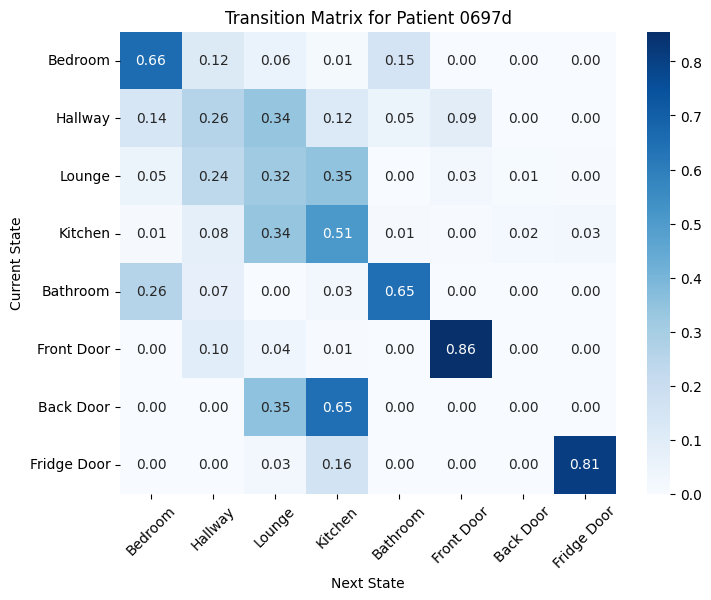

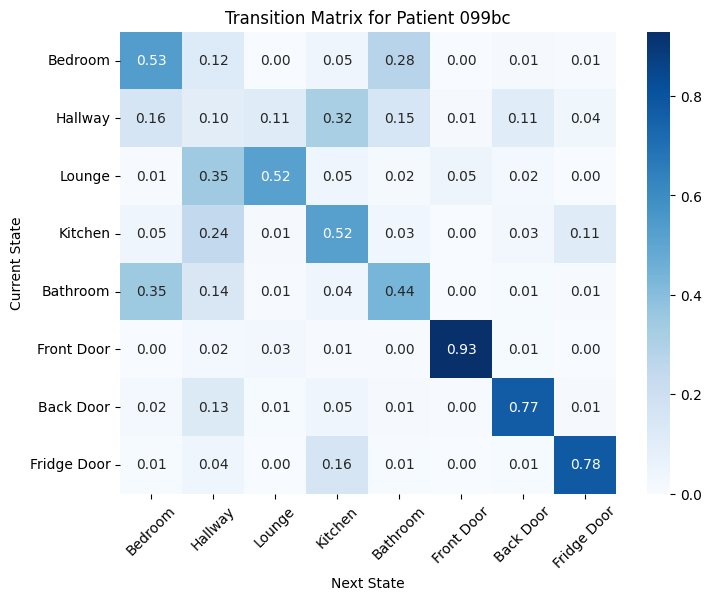

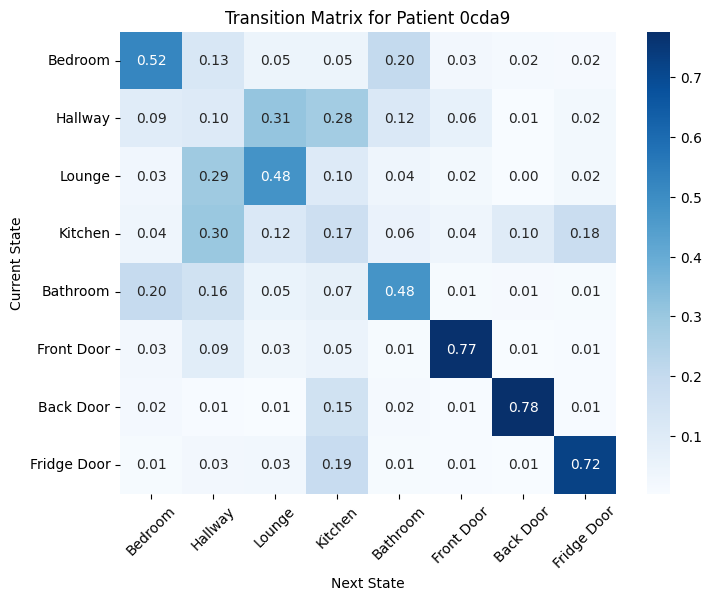

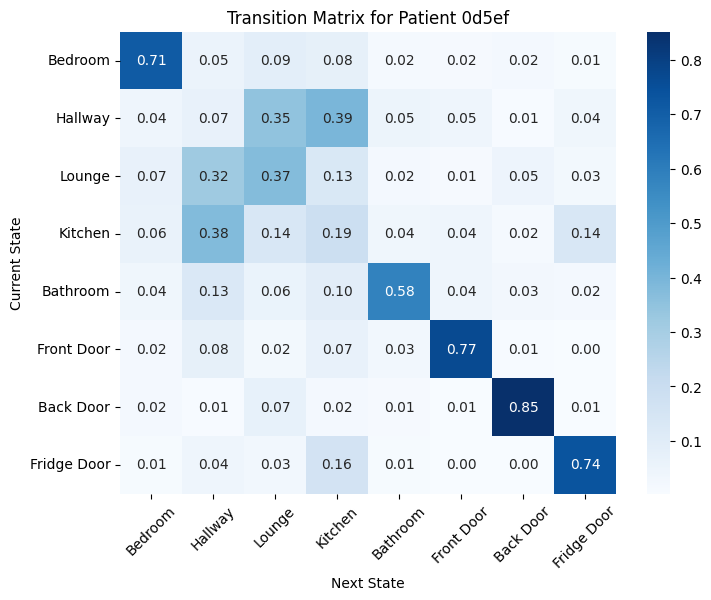

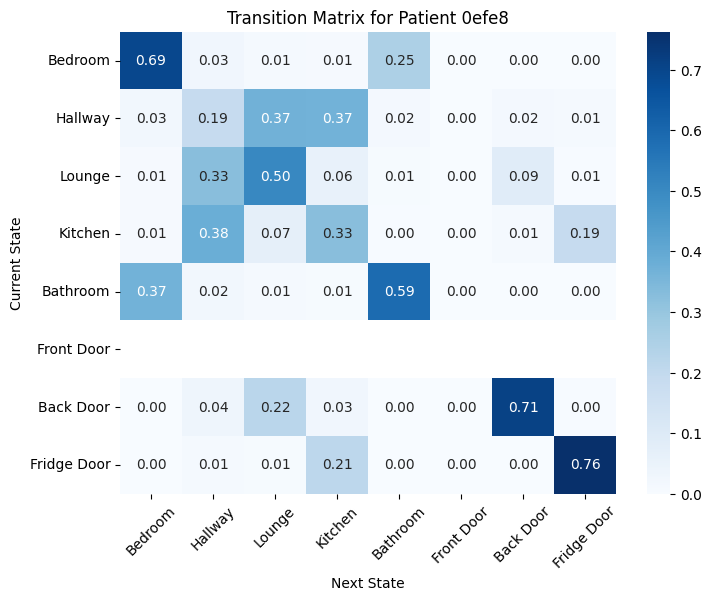

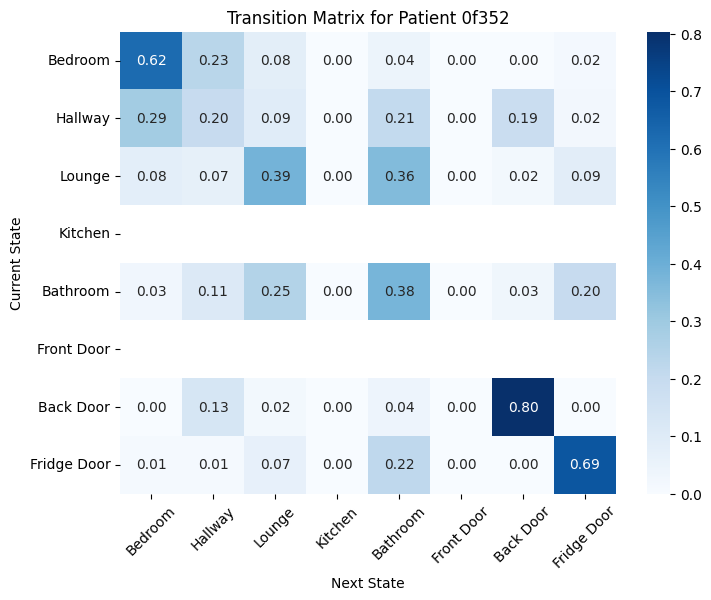

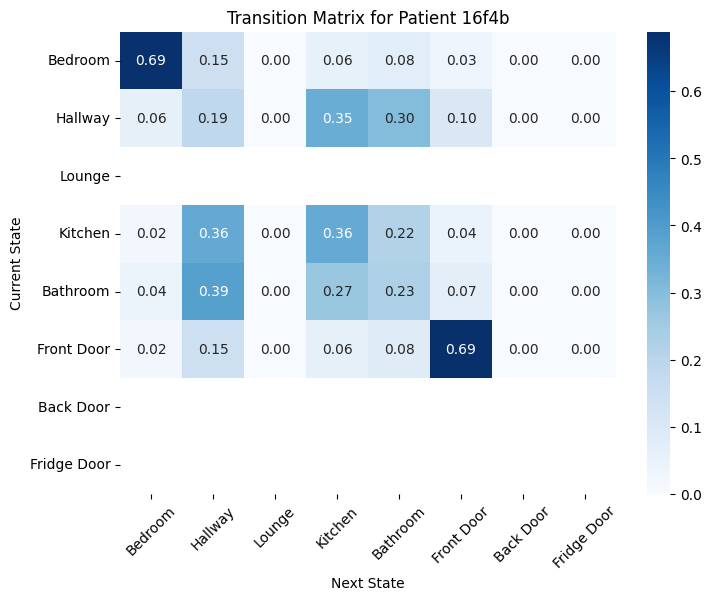

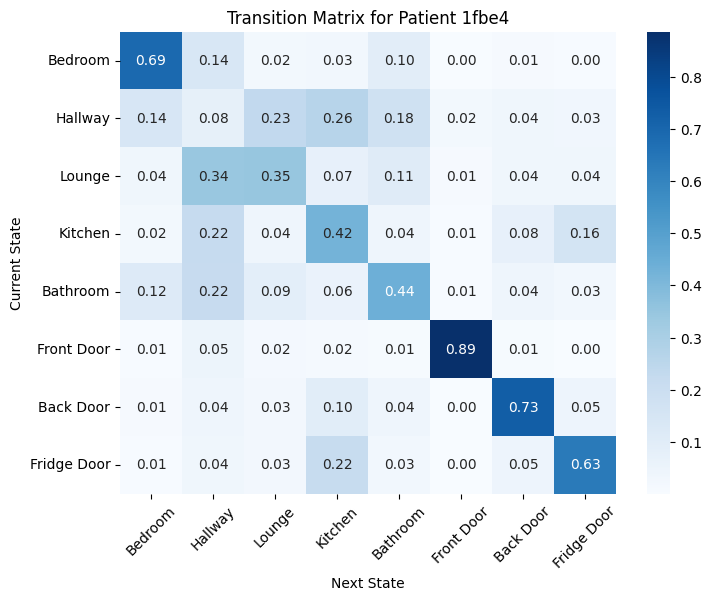

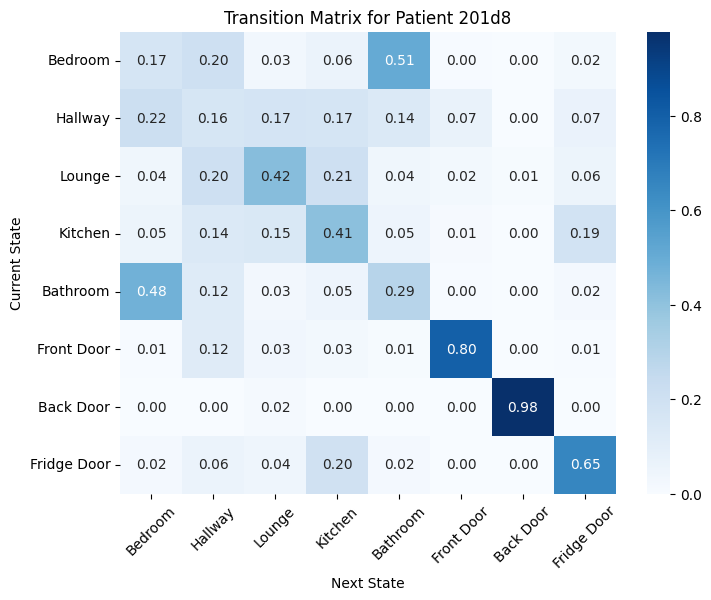

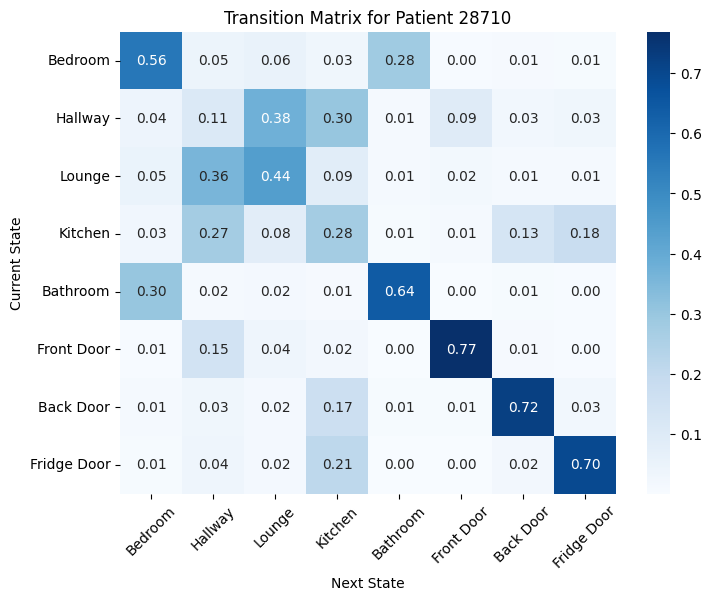

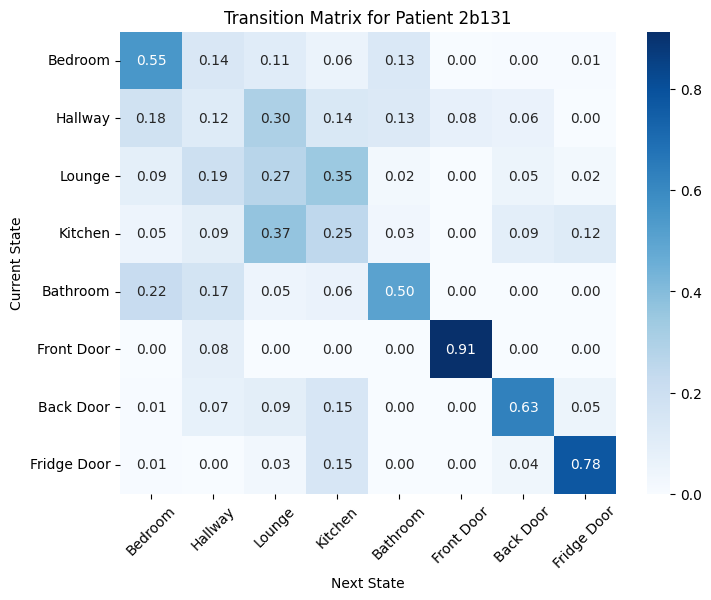

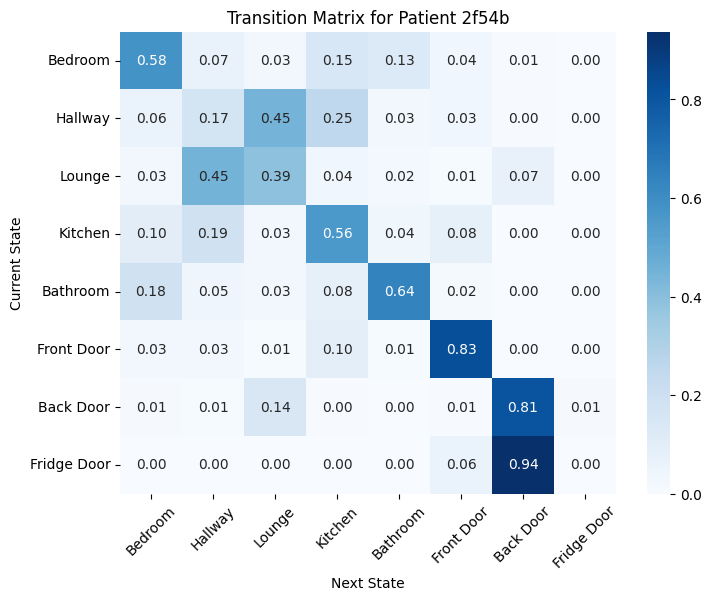

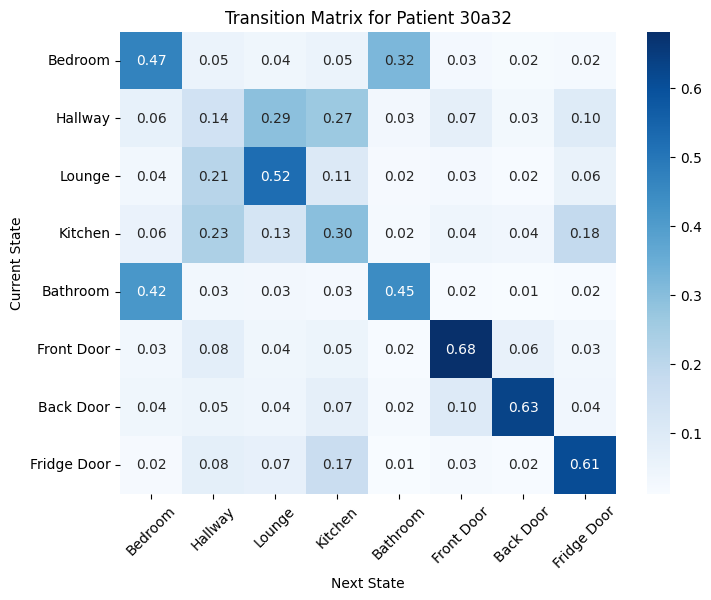

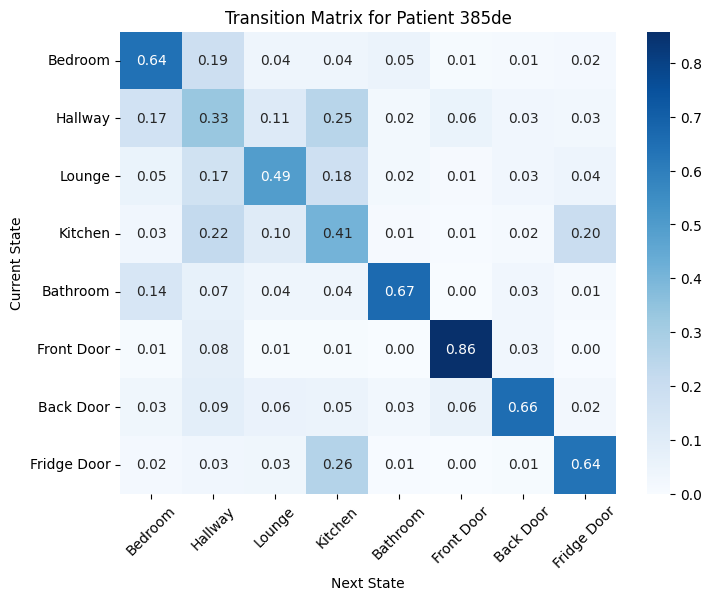

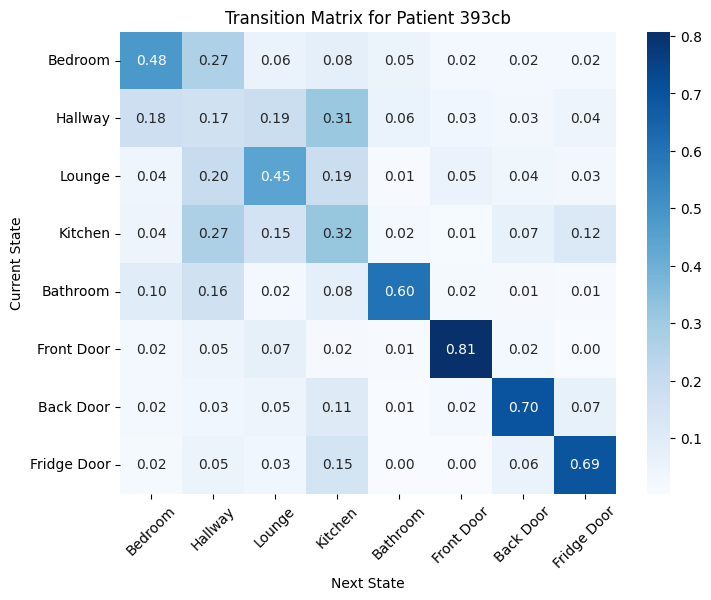

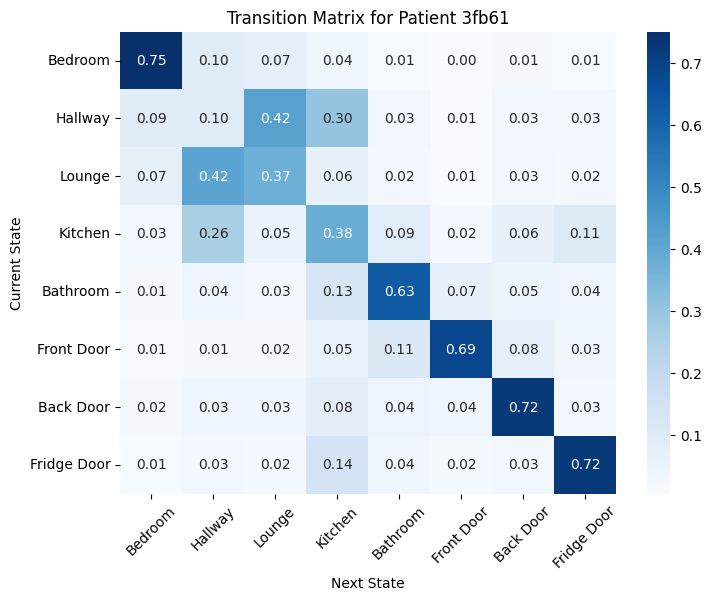

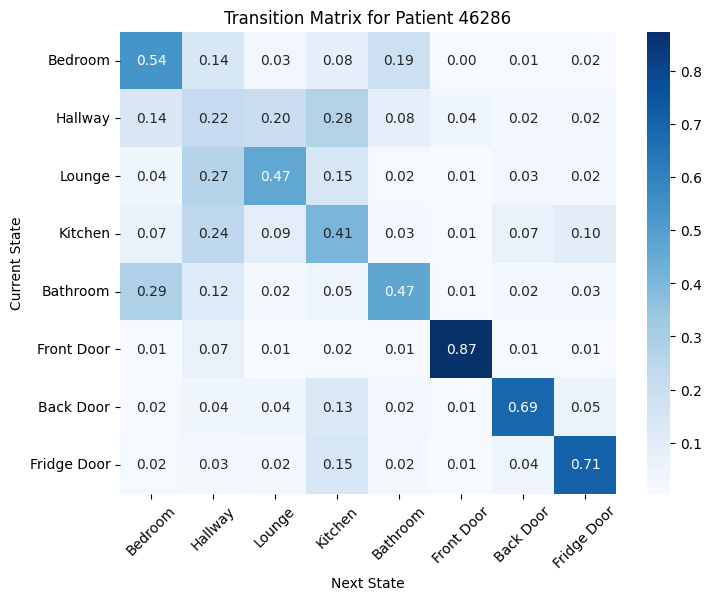

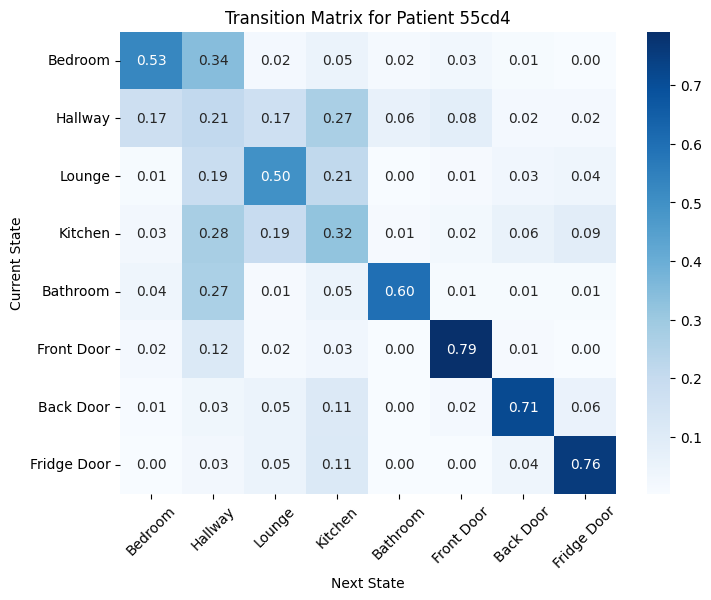

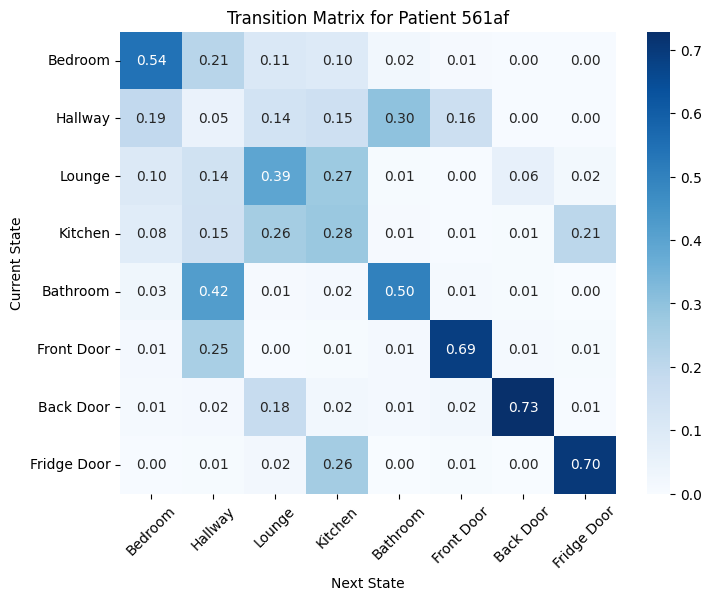

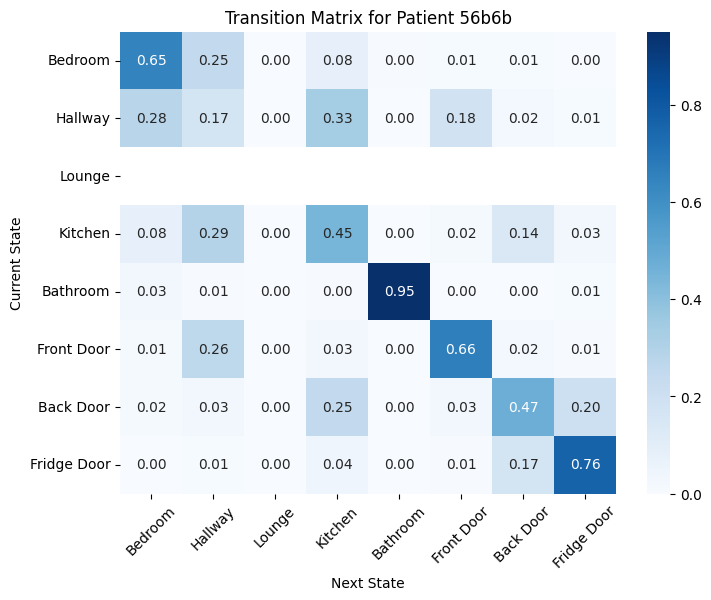

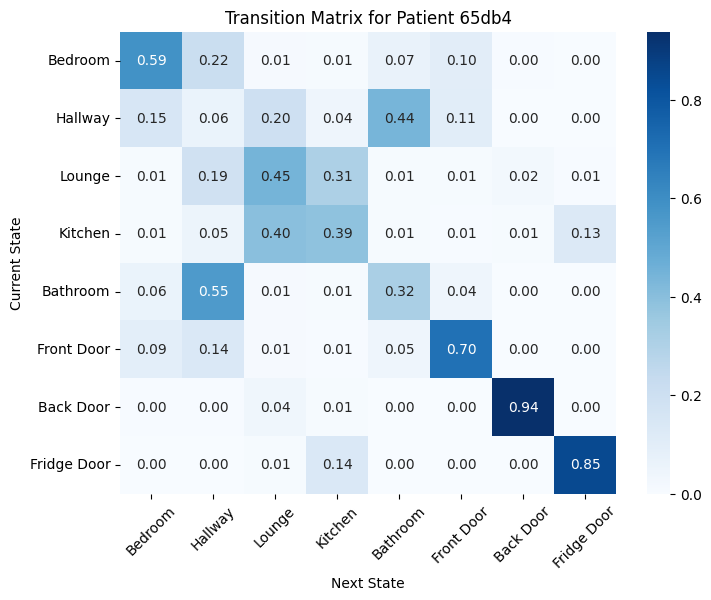

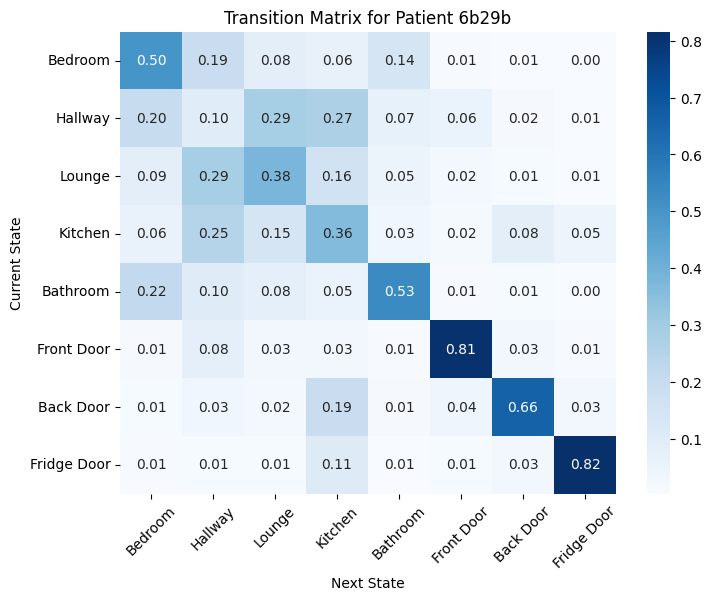

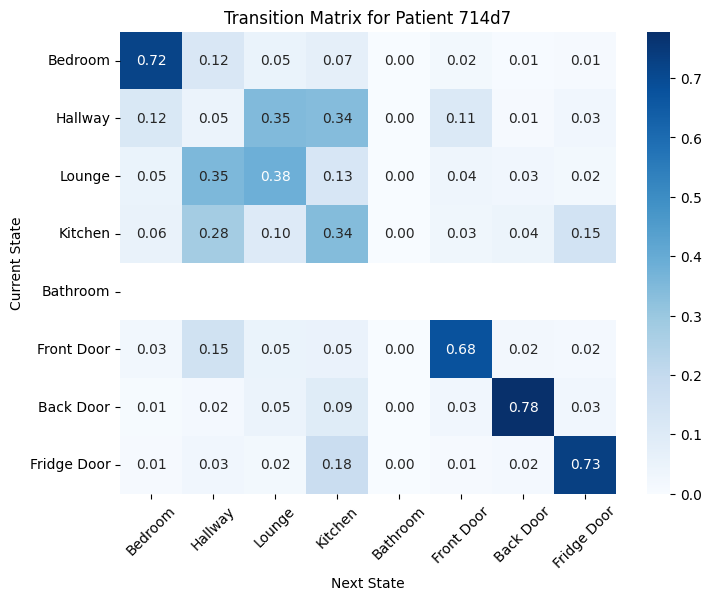

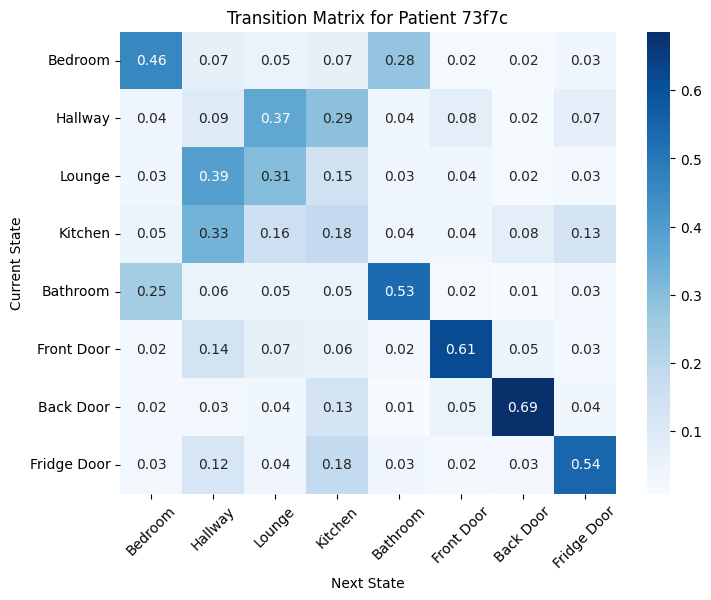

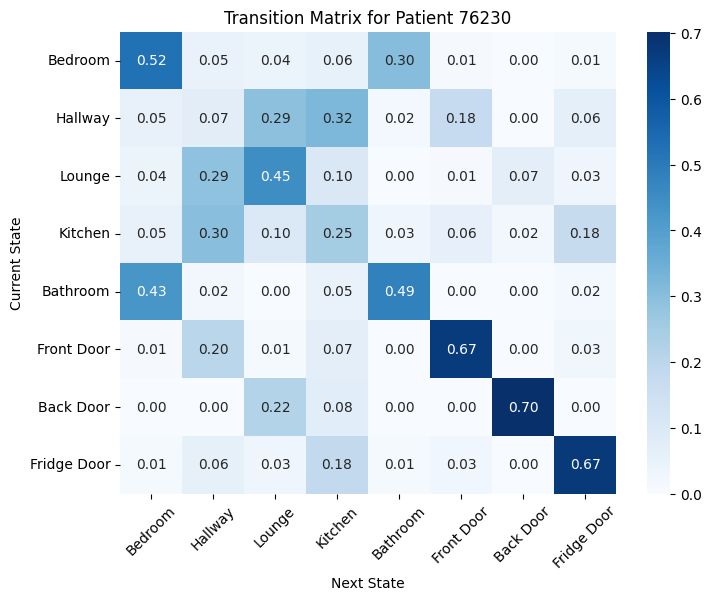

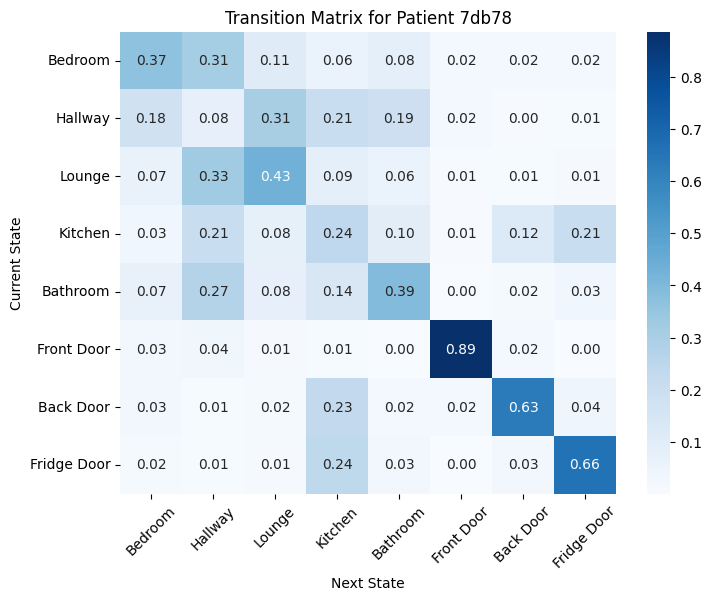

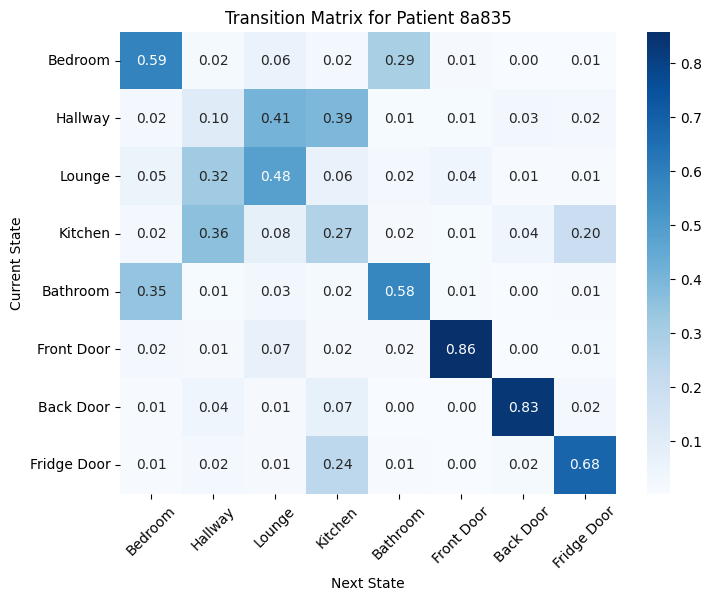

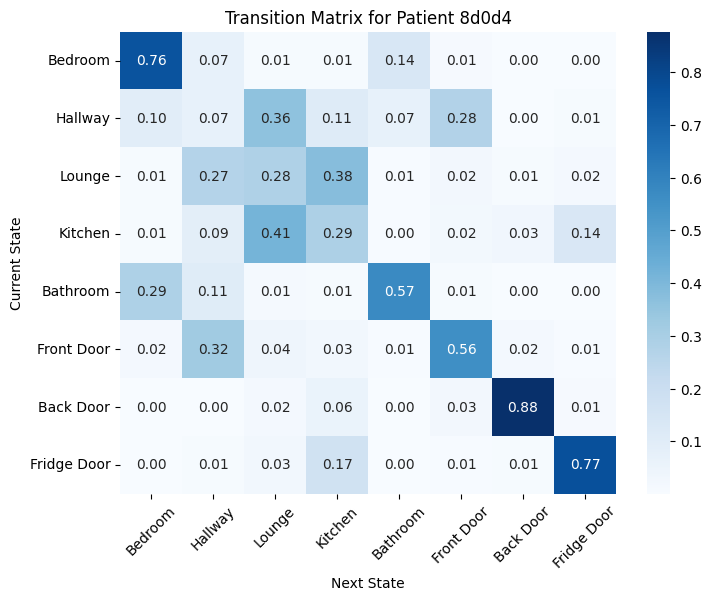

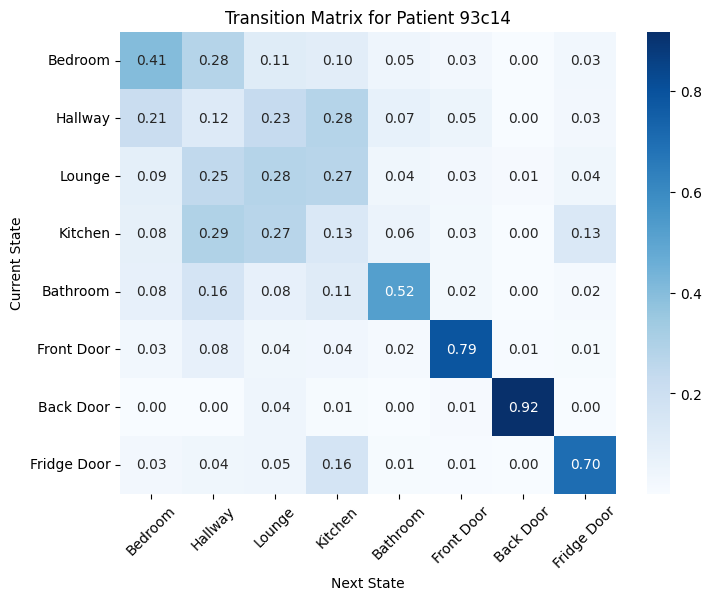

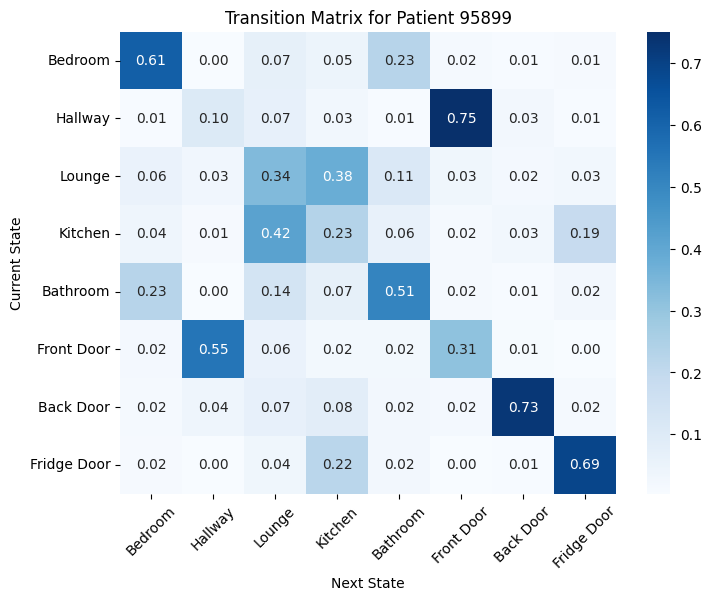

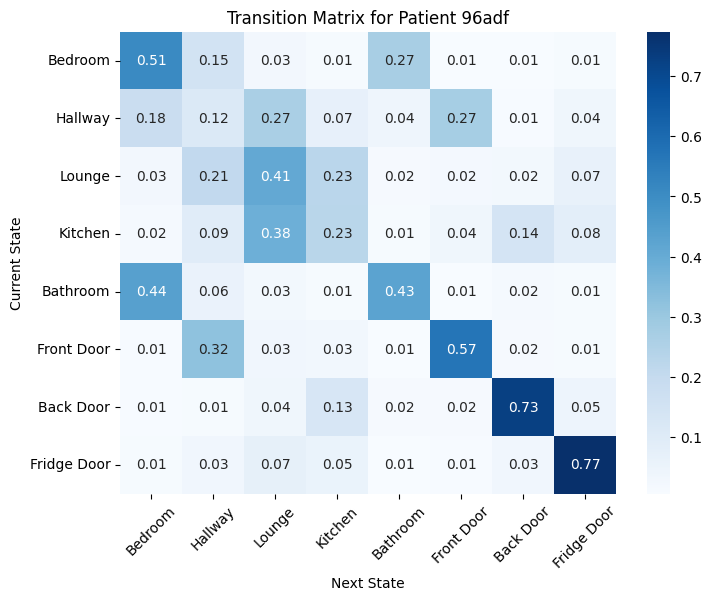

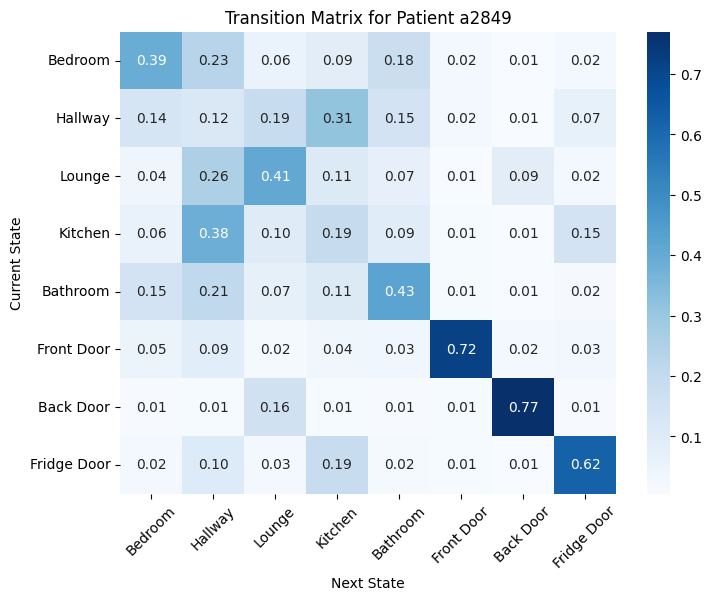

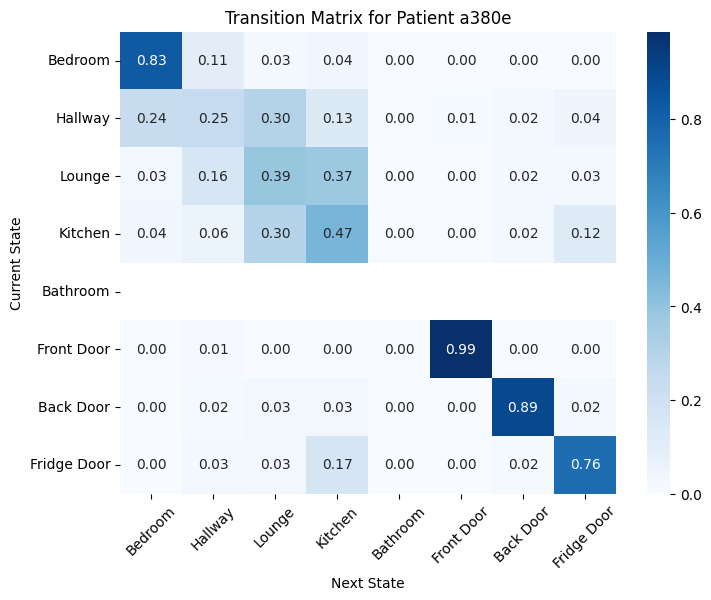

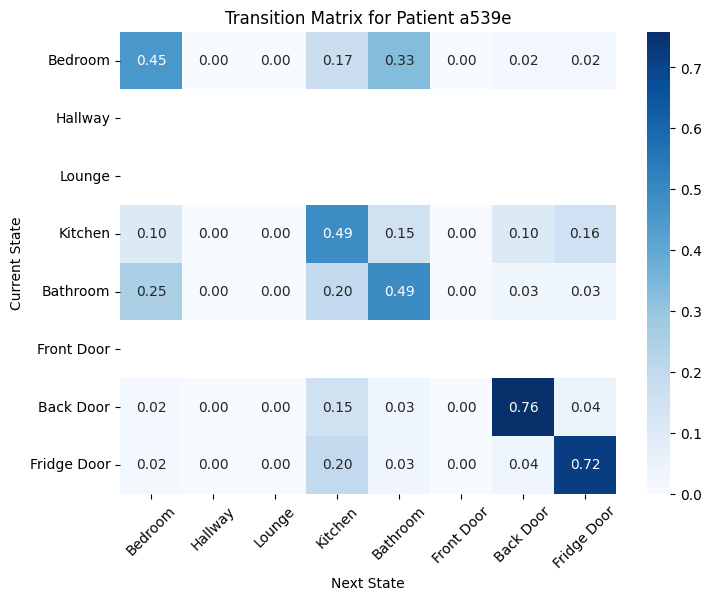

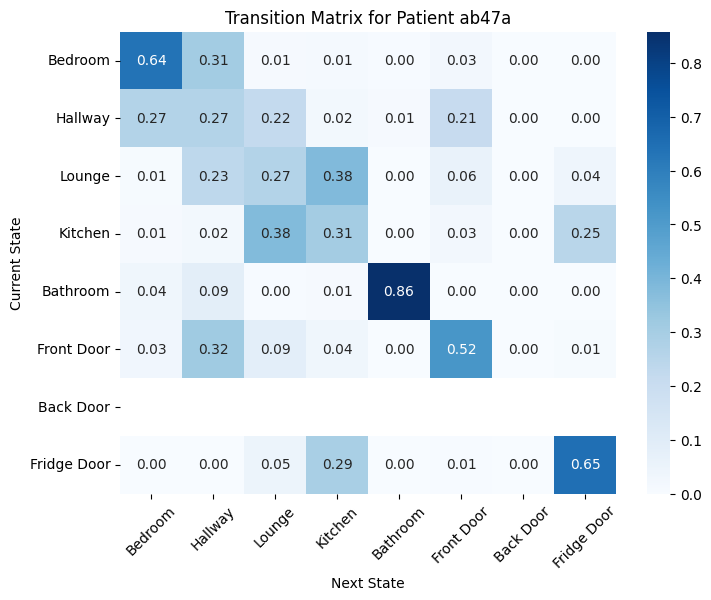

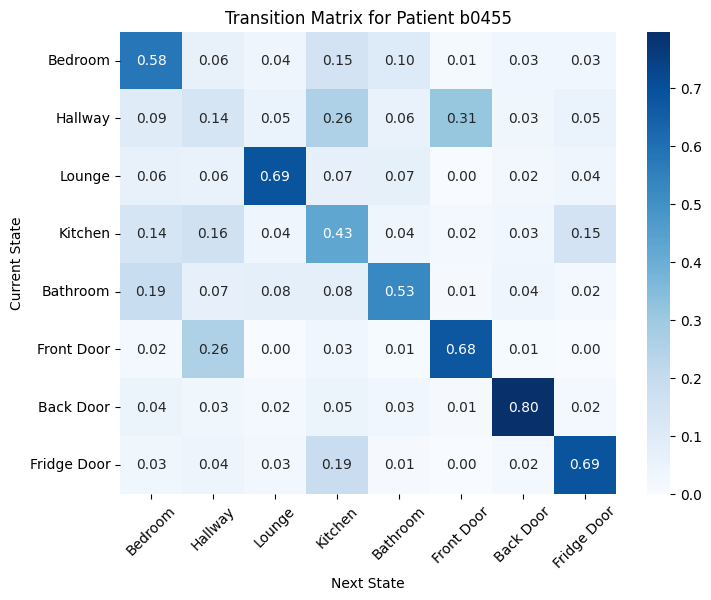

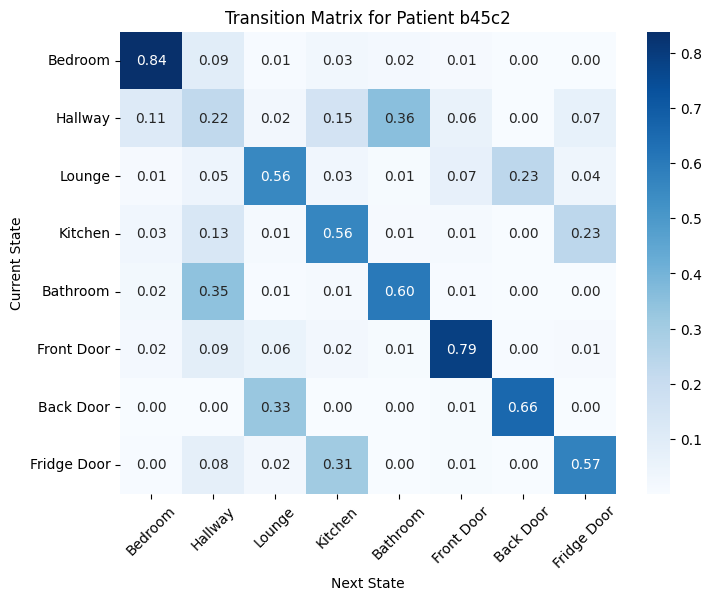

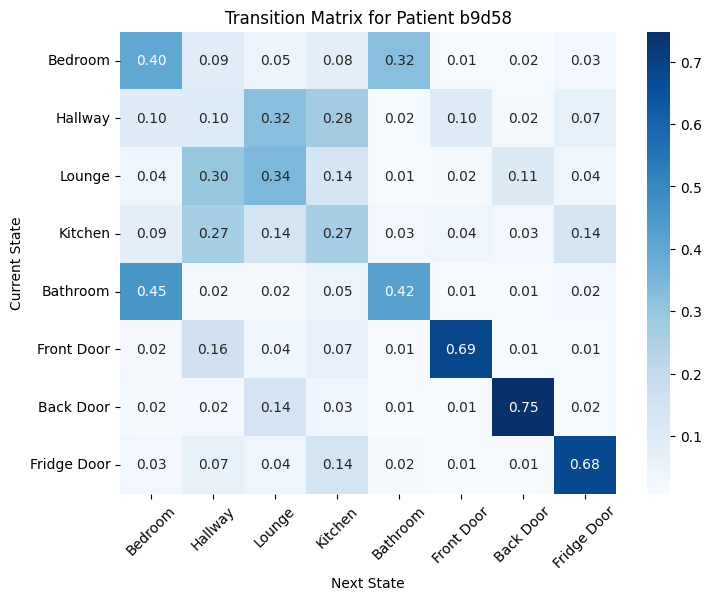

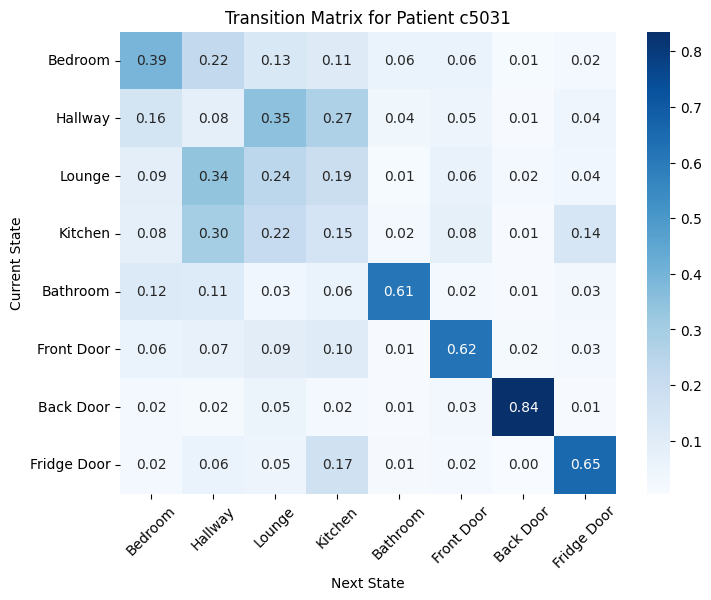

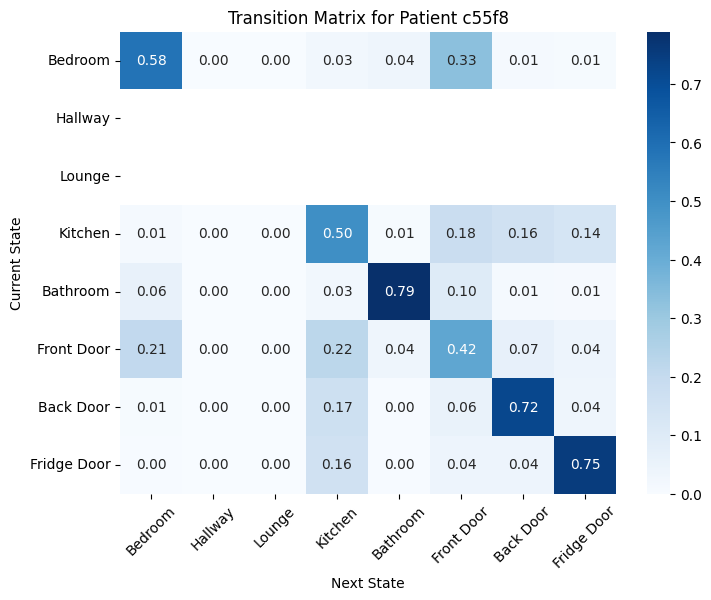

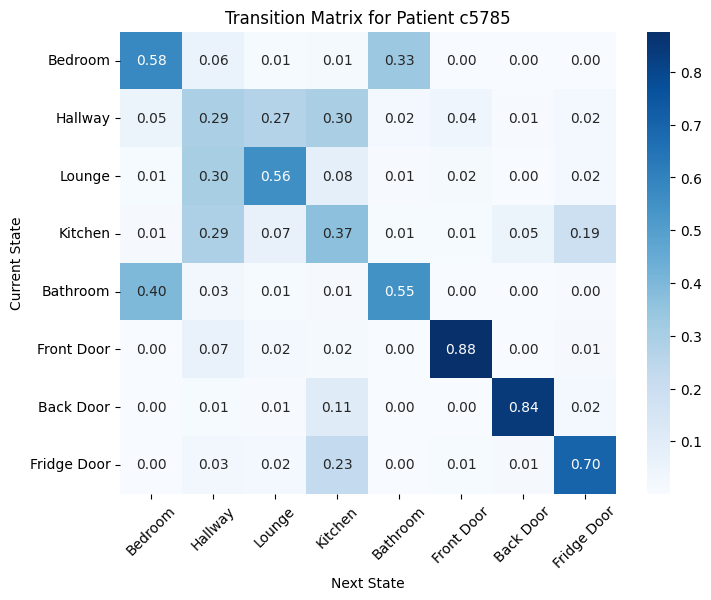

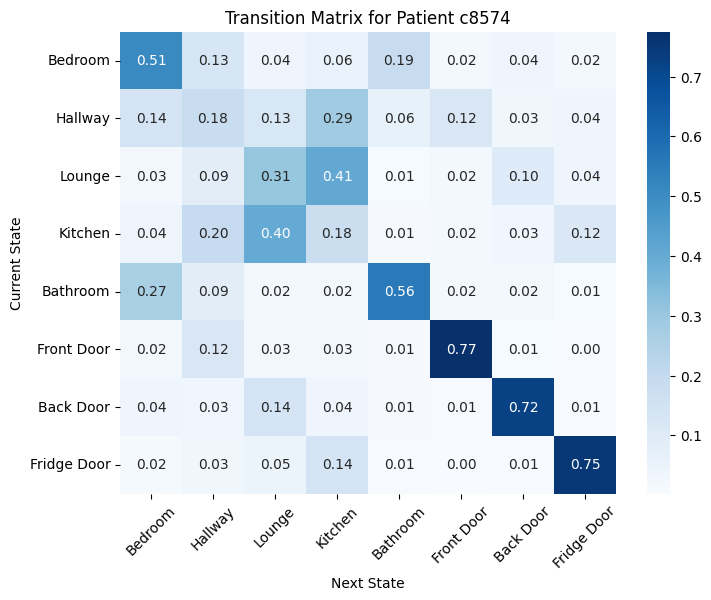

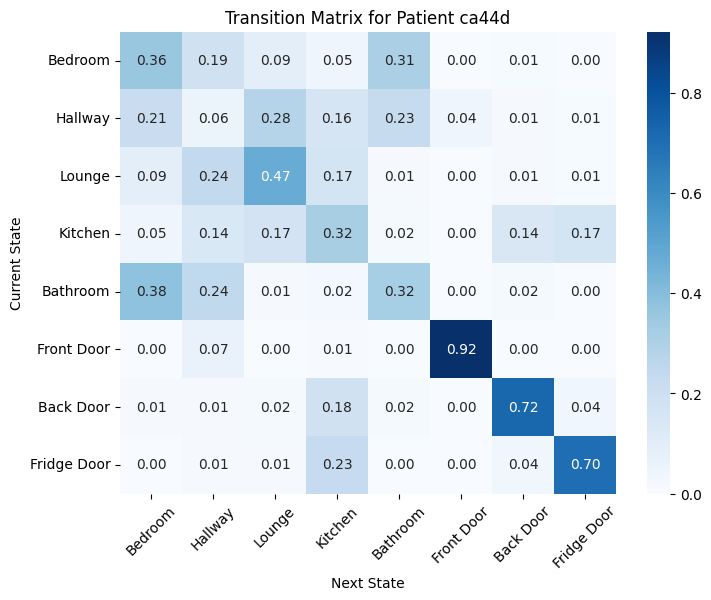

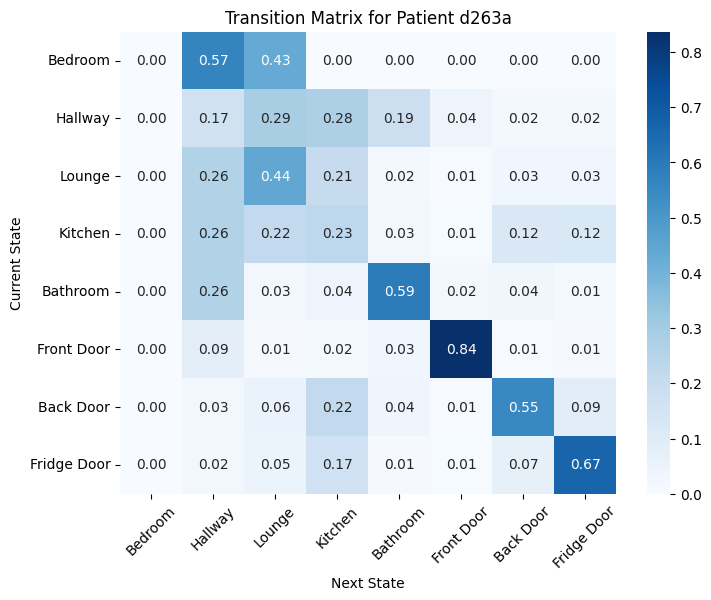

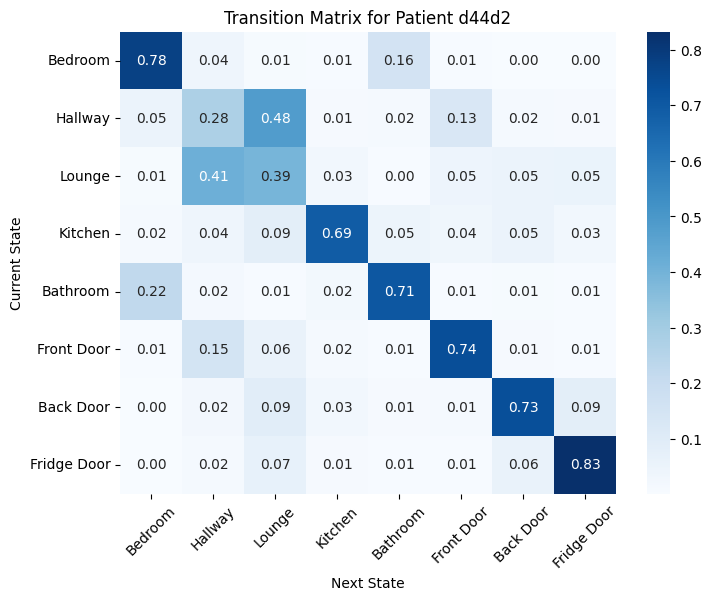

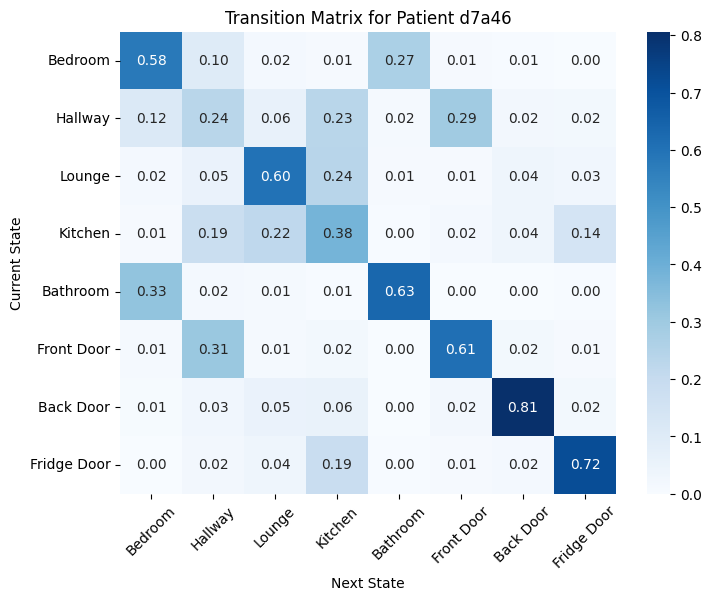

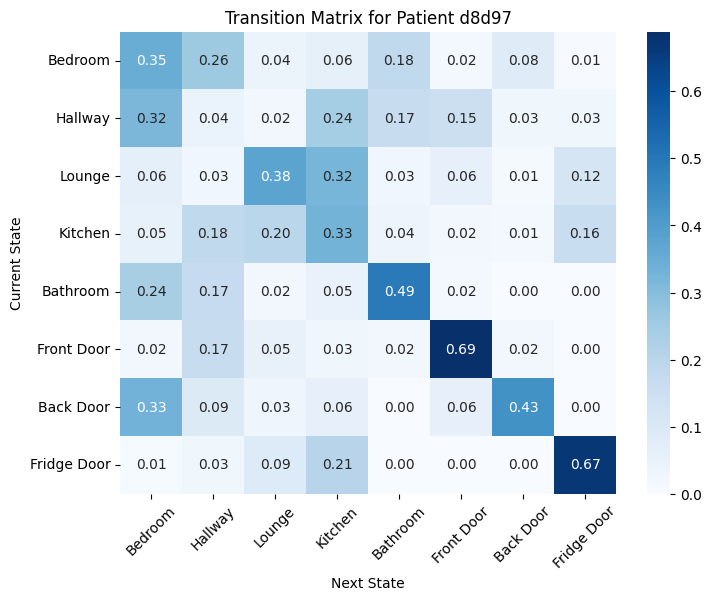

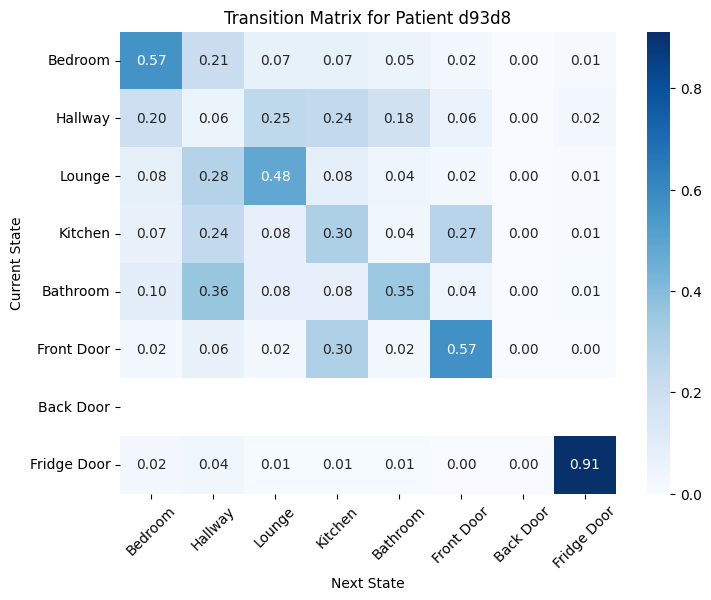

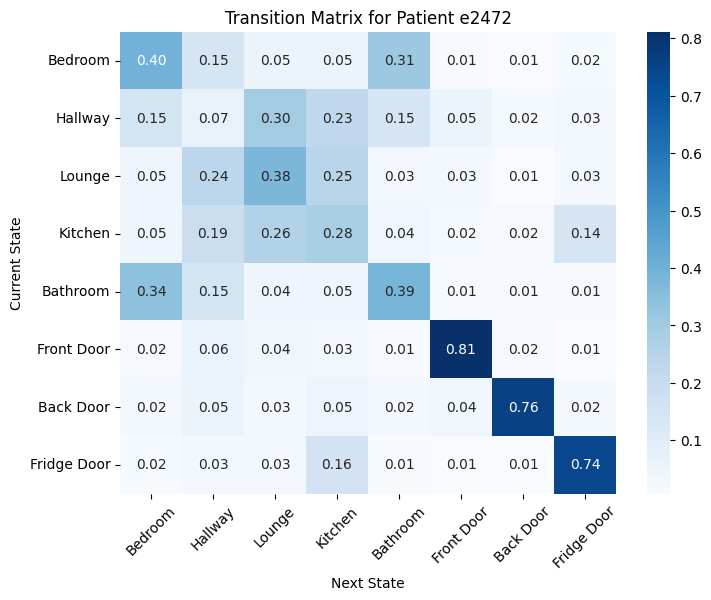

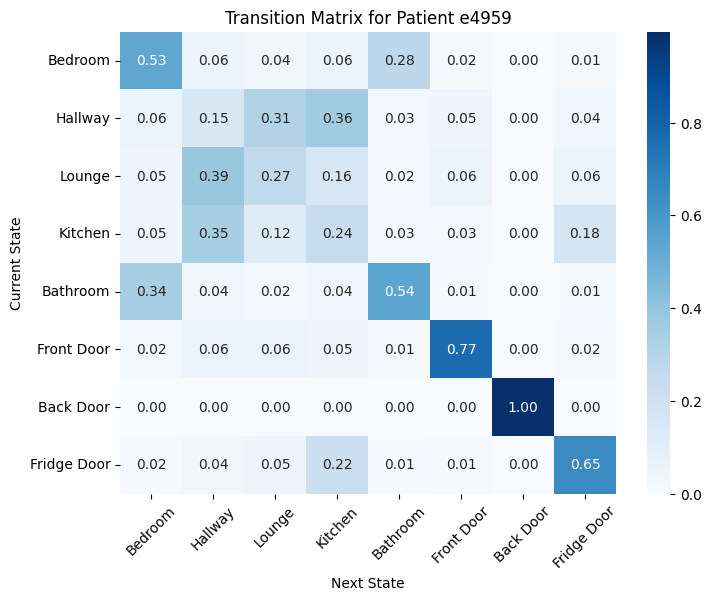

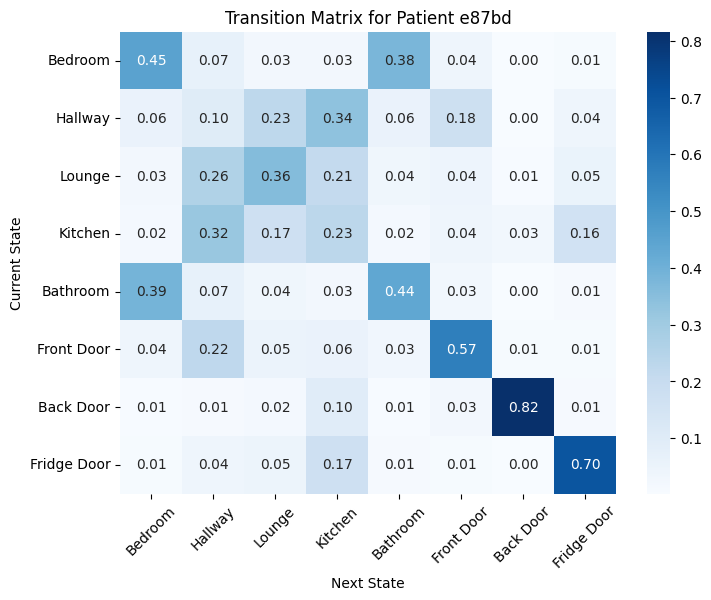

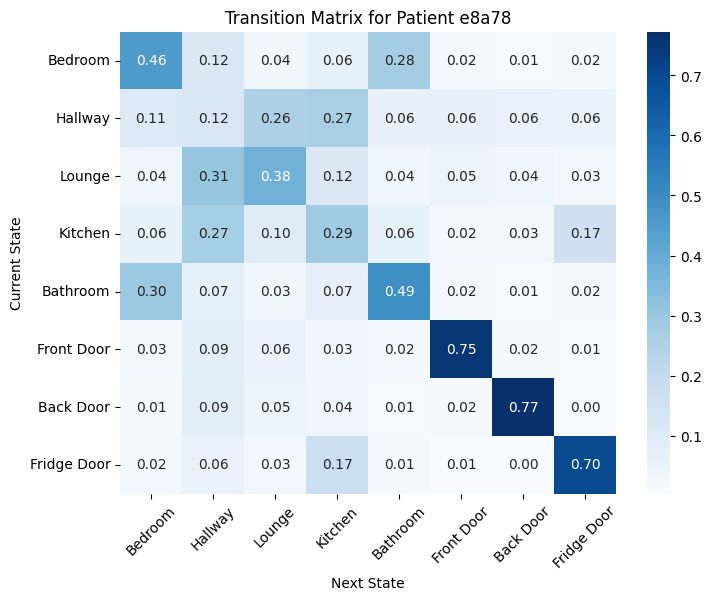

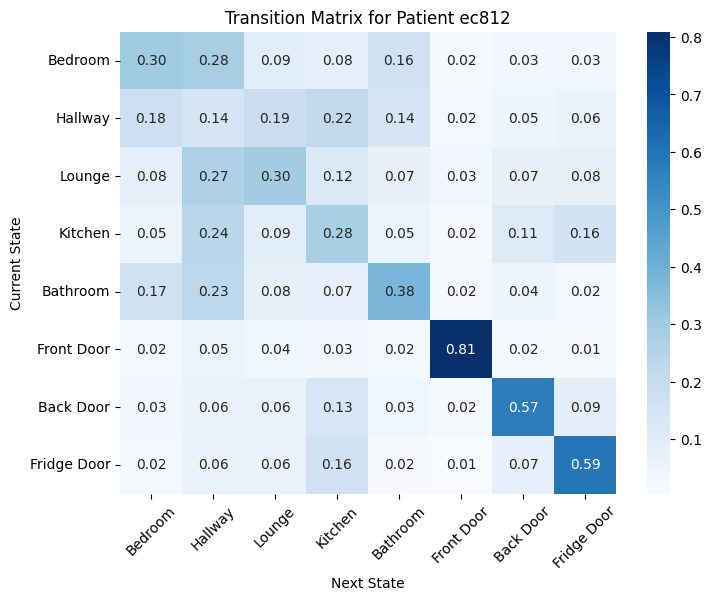

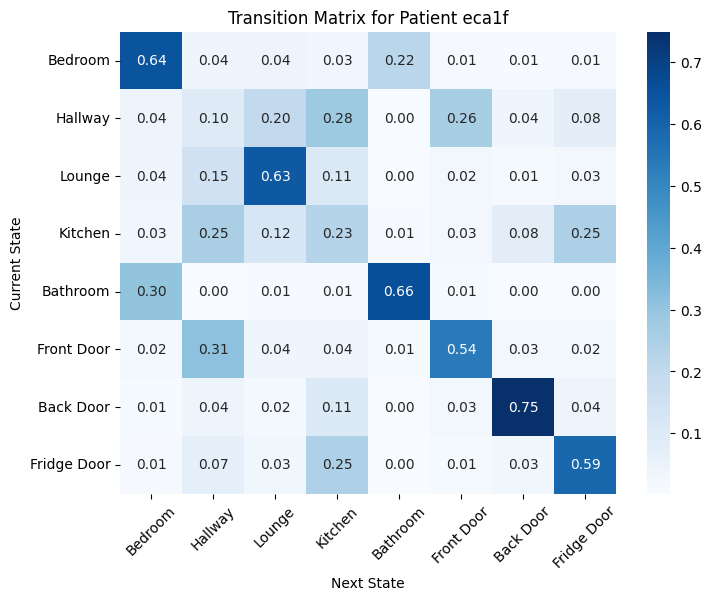

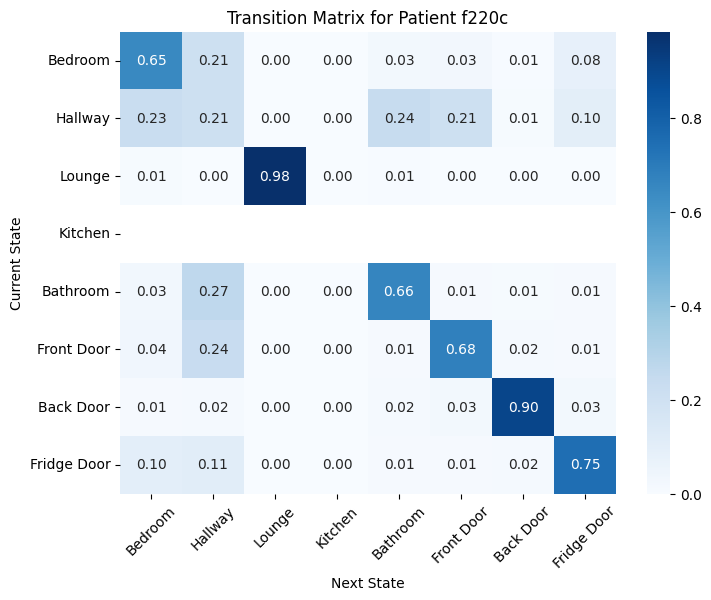

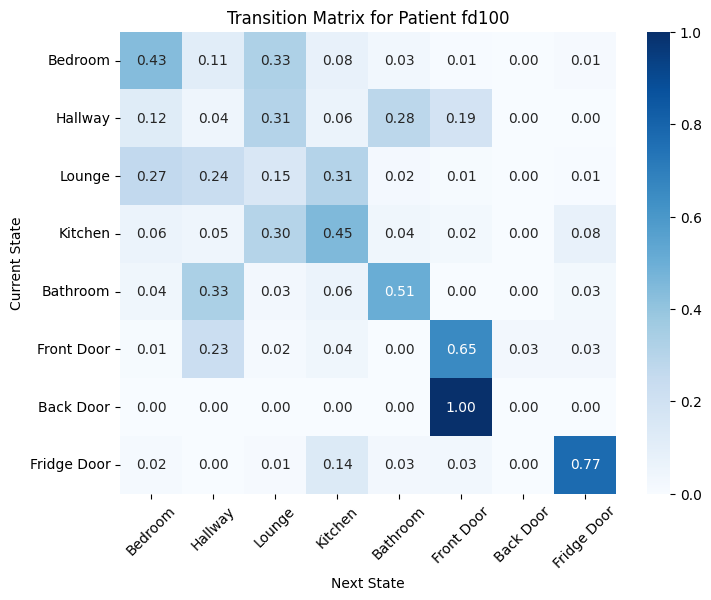

In [23]:
# Plot transition matrices for each patient
#states = states
n_state = state_map_reverse.__len__()
locations = [state_map_reverse[s] for s in range(n_state)]
for p in patients:
    plt.figure(figsize=(8, 6))
    df_matrix = pd.DataFrame(transition_matrix[p], index=locations, columns=locations)

    sns.heatmap(df_matrix, annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"Transition Matrix for Patient {p}")
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    plt.show()

In [ ]:
activity_df['location_name'].dtype

CategoricalDtype(categories=[4, 5, 3, 0, 2, 7, 1, 6], ordered=False, categories_dtype=int64)

In [ ]:
import numpy as np

threshold = 0.03
impossible_activity_count = {}

for p in patients:

    impossible_activity_count[p] = []

    patient_matrix = transition_matrix[p]  # Extract patient's transition matrix
    indices = np.where((patient_matrix < threshold))  # Find indices

    # Print indices in a more readable format
    #print(f"Patient {p}:")
    #print("Indices (row, col):", list(zip(*indices)))
    patient_rare_transitions = list(zip(*indices))
    days = activity_df['date'][activity_df['patient_id'] == p].unique()
    days = np.sort(days)

    for i, d in enumerate(days):
        counter = 0
        df = activity_df[(activity_df['patient_id'] == p) & (activity_df['date'] == d)]
        sequence = df['location_name'].tolist()
        timestamp = df['timestamp'].tolist()
        if not sequence:
            continue

        for s, t in zip(sequence[1:], timestamp[1:]):

            init_state = s
            init_time = t
            if (init_state,s) in patient_rare_transitions:
              counter+=1
        if counter>0:
          impossible_activity_count[p].append((d,counter))



In [ ]:
impossible_activity_count

{'0697d': [],
 '099bc': [],
 '0cda9': [],
 '0d5ef': [],
 '0efe8': [],
 '0f352': [],
 '16f4b': [],
 '1fbe4': [],
 '201d8': [],
 '28710': [],
 '2b131': [],
 '2f54b': [(datetime.date(2019, 5, 2), 2)],
 '30a32': [],
 '385de': [],
 '393cb': [],
 '3fb61': [],
 '46286': [],
 '55cd4': [],
 '561af': [],
 '56b6b': [],
 '65db4': [],
 '6b29b': [],
 '714d7': [],
 '73f7c': [],
 '76230': [],
 '7db78': [],
 '8a835': [],
 '8d0d4': [],
 '93c14': [],
 '95899': [],
 '96adf': [],
 'a2849': [],
 'a380e': [],
 'a539e': [],
 'ab47a': [],
 'b0455': [],
 'b45c2': [],
 'b9d58': [],
 'c5031': [],
 'c55f8': [],
 'c5785': [],
 'c8574': [],
 'ca44d': [],
 'd263a': [(datetime.date(2019, 4, 23), 2)],
 'd44d2': [],
 'd7a46': [],
 'd8d97': [(datetime.date(2019, 6, 24), 21),
  (datetime.date(2019, 6, 25), 30),
  (datetime.date(2019, 6, 26), 27),
  (datetime.date(2019, 6, 27), 38),
  (datetime.date(2019, 6, 28), 46),
  (datetime.date(2019, 6, 29), 37),
  (datetime.date(2019, 6, 30), 33)],
 'd93d8': [],
 'e2472': [],
 'e49

In [ ]:
occurence_threshold = 0
multiple_occupance_days = {}
for key, value in impossible_activity_count.items():
  multiple_occupance_days[key] = []
  for v in value:

    #print(v[1])
    if v[1]>= occurence_threshold:
      multiple_occupance_days[key].append(v[0])



In [ ]:
for k, v in multiple_occupance_days.items():
  activity_df.drop(activity_df[(activity_df['patient_id']==k) & (activity_df['date'].isin(v))].index, inplace=True)
  activity_df.reset_index(drop=True, inplace=True)
  labels_df.drop(labels_df[(labels_df['patient_id']==k) & (labels_df['date'].isin(v))].index, inplace=True)
  labels_df.reset_index(drop=True, inplace=True)

In [ ]:
labels_df.loc[labels_df['label']=='Agitation'].shape

(135, 5)

In [ ]:
activity_df['location_name'] = activity_df['location_name'].map(state_map_reverse)

Data Combining

In [ ]:
seed = 2025  # Set your desired seed value


# Set the number of negative samples per positive sample
negative_sample_size = 1

# Missing data filling approach for physiology data (Currently, just filling
# with average value on all normal days is considered)
if_fill_physiology = True
fill_type = 'average_all_normal_days'

# Observation backward time-window for activities
interval = 6 # backward Time Window

# True if all past and future normal samples are consideredfor degree calculation,
# otherwise it considers only past
non_agit_observe_all = True
observation_window = 14 # active when non_agit_observe_all = False
observation_window = pd.Timedelta(days=observation_window) # The reason is that we want to limit the window for each sample to make comparisons more meaningful

# Set seed for Python's and Numpy's random modules
random.seed(seed)
np.random.seed(seed)

# Average physiology parameters in general in case a patient don't have these measurements at all
avg_params = {
    'Body Temperature':36.0,
    'Body weight':70.0,
    'Diastolic blood pressure':80.0,
    'Heart rate':90.0,
    'O/E - muscle mass':40.0,
    'Skin Temperature':35.0,
    'Systolic blood pressure':160.0,
    'Total body water':50.0
}

#  Filter agitation samples to discover the patients with agitation
agitation_df = labels_df[labels_df['label']=='Agitation'].copy()
agitation_patientID = agitation_df['patient_id'].tolist()

# Set observation window duration for activities and determine start time of observation window for each agitation sample
agitation_endTime = agitation_df['timestamp'].tolist()
agitation_startTime = pd.to_datetime(agitation_endTime) - pd.Timedelta(hours=interval)
agitation_startTime = agitation_startTime.tolist()

# Find the number of agitation samples associated with each patient in agitation dataframe
agitation_patients = np.unique(agitation_df['patient_id'])
each_patient_agitation_sample = agitation_df['patient_id'].value_counts()

# Store the dates for available agitation label, activity, and physiological measurements per patient
agitation_days = {}
activity_days = {}
physiology_days = {}

# Loop through the datasets to collect required data
for id in agitation_patients:
   agitation_days[id] = agitation_df['date'][agitation_df['patient_id'] == id].unique()
   activity_days[id] = activity_df['date'][activity_df['patient_id'] == id].unique()
   physiology_days[id] = physiology_df['date'][physiology_df['patient_id'] == id].unique()


agitation_dataset = []
non_agitation_dataset = []

# Iterate through each patient_id, start_time, and end_time
for index, (patient_id, start_time, end_time) in enumerate(zip(agitation_patientID, agitation_startTime, agitation_endTime)):

    ## demographics data
    patient_age = demographics_df[demographics_df['patient_id']==patient_id]['age'].values[0]
    patient_sex = demographics_df[demographics_df['patient_id']==patient_id]['sex'].values[0]

    patient_agit_days = agitation_days[patient_id]
    patient_activity_days = activity_days[patient_id]
    patient_non_agit_days = np.array([date for date in patient_activity_days if date not in patient_agit_days])
    patient_physiology_days = physiology_days[patient_id]
    patient_non_agit_physio_days = [date for date in patient_non_agit_days if date in patient_physiology_days]


    print(f'{index}-user: {patient_id} - from {start_time} to {end_time}')

    # Filter the DataFrame for the current patient and time range
    filtered_df = activity_df[(activity_df['patient_id'] == patient_id) &
                            (activity_df['timestamp'] >= start_time) &
                            (activity_df['timestamp'] <= end_time)]

    # Store the results in the list
    agit_activity = filtered_df['location_name'].tolist()


    if non_agit_observe_all:
      patient_observed_non_agit_days = patient_non_agit_days.copy()
    else:
      patient_observed_non_agit_days = patient_non_agit_days[((end_time.date() - observation_window) <patient_non_agit_days)
                                                             & (patient_non_agit_days<end_time.date())]

    agit_weekday = pd.Timestamp(end_time).day_name()

    # separate the corresponding non agitation intervals from normal days of each patient
    observed_non_agit_activity = []
    for d in patient_observed_non_agit_days:
      if start_time.time() < end_time.time():
        filtered_df = activity_df[(activity_df['patient_id'] == patient_id) &
                                  (activity_df['date'] == d) &
                                  (activity_df['time'] >= start_time.time()) &
                                  (activity_df['time'] <= end_time.time())]
      else:
        raise Exception("Start time is after end time")


      observed_non_agit_activity.append(filtered_df['location_name'].tolist())
    #print(f' observed size: {len(observed_non_agit_activity)}')

    ### physiology parameters
    agit_params = []
    agit_physio_df = physiology_df[(physiology_df['patient_id']==patient_id) & (physiology_df['date']==end_time.date())]
    agit_unique_params = agit_physio_df['device_type'].unique().tolist()

    ### for agitation samples
    for param in physiology_parameters:
        if (param in agit_unique_params):
            agit_params.append((param,agit_physio_df['value'][agit_physio_df['device_type'] == param].mean()))
            #print('value exists')
        else:
            #print('no value')
            if if_fill_physiology:

              if fill_type == 'average_all_normal_days':

                selected_physio_to_fill = physiology_df['value'][(physiology_df['patient_id']==patient_id) &
                  (physiology_df['device_type'] == param) & (physiology_df['date'].isin(patient_non_agit_physio_days))].tolist()

                value = avg_params[param] if not selected_physio_to_fill else np.mean(selected_physio_to_fill)
              else:
                raise Exception("Fill type not supported")

            else:
              print('Filled with NaN')
              value = None

            agit_params.append((param,value))


    agitation_dataset.append([patient_id, start_time, end_time, agit_activity, observed_non_agit_activity, agit_params, patient_age, patient_sex, agit_weekday])


    ## Now we want to perform negative sampling from all non agit days within the same time period

    if len(patient_non_agit_days) > 0:
        sampled_non_agit_days = np.random.choice(patient_non_agit_days, size=min(negative_sample_size, len(patient_non_agit_days)), replace=False)
    else:
        sampled_non_agit_days = []

    for day in sampled_non_agit_days:

      # The same time start and end but in a different day
      start_time_non_agit = pd.Timestamp.combine(day, start_time.time())
      end_time_non_agit = pd.Timestamp.combine(day, end_time.time())

      print(f'\t non-agit: {patient_id} - from {start_time_non_agit} to {end_time_non_agit}')

      # Filter the DataFrame for the current patient and time range
      filtered_df = activity_df[(activity_df['patient_id'] == patient_id) &
                              (activity_df['timestamp'] >= start_time_non_agit) &
                              (activity_df['timestamp'] <= end_time_non_agit)]

      # Store the results in the list
      non_agit_activity = filtered_df['location_name'].tolist()

      if non_agit_observe_all:
        patient_observed_non_agit_days = patient_non_agit_days.copy()
        # In this case, we do not need to recalculate observed_non_agit_activity
      else:
        patient_observed_non_agit_days = patient_non_agit_days[((day - observation_window)<patient_non_agit_days)
                                                             & (patient_non_agit_days<day)]
        # separate the corresponding non agitation intervals from normal days of each patient
        observed_non_agit_activity = []
        for d in patient_observed_non_agit_days:
          if start_time.time() < end_time.time():
            filtered_df = activity_df[(activity_df['patient_id'] == patient_id) &
                                      (activity_df['date'] == d) &
                                      (activity_df['time'] >= start_time.time()) &
                                      (activity_df['time'] <= end_time.time())]
          else:
            raise Exception("Start time is after end time")
        observed_non_agit_activity.append(filtered_df['location_name'].tolist())

      non_agit_weekday = pd.Timestamp(end_time_non_agit).day_name()

      print(f' observed size: {len(observed_non_agit_activity)}')


      non_agit_params = []
      non_agit_physio_df = physiology_df[(physiology_df['patient_id']==patient_id) & (physiology_df['date']==day)]
      non_agit_unique_params = non_agit_physio_df['device_type'].unique().tolist()

      for param in physiology_parameters:
          if (param in non_agit_unique_params):
              non_agit_params.append((param,non_agit_physio_df['value'][non_agit_physio_df['device_type'] == param].mean()))
              print('value exists')
          else:
              print('No value')
              if if_fill_physiology:

                if fill_type == 'average_all_normal_days':

                  selected_physio_to_fill = physiology_df['value'][(physiology_df['patient_id']==patient_id) &
                    (physiology_df['device_type'] == param) & (physiology_df['date'].isin(patient_non_agit_physio_days))].tolist()

                  value = avg_params[param] if not selected_physio_to_fill else np.mean(selected_physio_to_fill)
                else:
                  raise Exception("Fill type not supported")

              else:
                print('Filled with NaN')
                value = None

              non_agit_params.append((param,value))

      # Append to non_agitation_dataset.
      non_agitation_dataset.append([patient_id, start_time_non_agit, end_time_non_agit, non_agit_activity, observed_non_agit_activity, non_agit_params, patient_age, patient_sex, non_agit_weekday])


# Save the datasets
import pickle
pickle.dump(agitation_dataset,open(f'/content/drive/MyDrive/datasets/agitation_dataset_tm{threshold}_clean.pkl','wb'))
pickle.dump(non_agitation_dataset,open(f'/content/drive/MyDrive/datasets/non_agitation_dataset_tm{threshold}_clean.pkl','wb'))


0-user: 16f4b - from 2019-04-11 06:00:22 to 2019-04-11 12:00:22
	 non-agit: 16f4b - from 2019-04-29 06:00:22 to 2019-04-29 12:00:22
 observed size: 78
value exists
No value
value exists
value exists
No value
value exists
value exists
No value
1-user: 16f4b - from 2019-04-14 06:00:07 to 2019-04-14 12:00:07
	 non-agit: 16f4b - from 2019-06-02 06:00:07 to 2019-06-02 12:00:07
 observed size: 78
No value
No value
No value
No value
No value
No value
No value
No value
2-user: 16f4b - from 2019-04-15 12:00:24 to 2019-04-15 18:00:24
	 non-agit: 16f4b - from 2019-06-14 12:00:24 to 2019-06-14 18:00:24
 observed size: 78
No value
No value
No value
No value
No value
No value
No value
No value
3-user: 16f4b - from 2019-04-16 12:00:38 to 2019-04-16 18:00:38
	 non-agit: 16f4b - from 2019-05-26 12:00:38 to 2019-05-26 18:00:38
 observed size: 78
No value
No value
No value
No value
No value
No value
No value
No value
4-user: 16f4b - from 2019-04-21 06:00:55 to 2019-04-21 12:00:55
	 non-agit: 16f4b - from

In [ ]:
class AGITATION_DATASET():
  def __init__(self,dataset, location_names, physiology_names):
    num_samples = len(dataset)
    self.patient_id = [dataset[i][0] for i in range(num_samples) ]
    self.start_time = [dataset[i][1] for i in range(num_samples) ]
    self.end_time = [dataset[i][2] for i in range(num_samples) ]
    self.activity = [dataset[i][3] for i in range(num_samples) ]
    self.non_agitation = [dataset[i][4] for i in range(num_samples) ]
    self.agitation_params = [dataset[i][5] for i in range(num_samples) ]
    self.age = [dataset[i][6] for i in range(num_samples) ]
    self.gender = [dataset[i][7] for i in range(num_samples) ]
    self.week_day = [dataset[i][8] for i in range(num_samples) ]

    # Initiate the dataframe with basic informations
    self.init_df()
    self.location_names = location_names
    self.location_columns = []
    self.location_columns.extend(self.location_names)
    relative_cols = []
    mean_cols = []
    std_cols = []
    for location in self.location_names:
      relative_cols.append(location+'_count_relative')
      mean_cols.append('normal_'+location+'_count_mean')
      std_cols.append('normal_'+location+'_count_std')
    self.location_columns.extend(relative_cols)
    self.location_columns.extend(mean_cols)
    self.location_columns.extend(std_cols)
    self.physiology_names = physiology_names
  def __len__(self):
    return len(self.patient_id)
  def init_df(self):
    self.feature_df = pd.DataFrame(np.column_stack((self.patient_id,
                      self.start_time, self.end_time, self.week_day, self.age, self.gender)),
                       columns=['patient_id', 'start_time', 'end_time', 'week_day','age', 'gender'])
  def activity_change(self, inplace = True):
    activity_change = []
    for index in range(self.__len__()):
      dummy = self.activity[index]
      dummy = np.array(dummy)
      result = np.concatenate([[np.NaN], dummy[1:] != dummy[:-1]])
      changed = np.nansum(result)

      normal_activity_changes = []
      count_sample = 0
      normal_activity_samples = len(self.non_agitation[index])

      for arr in self.non_agitation[index]:
        arr = np.array(arr)
        if len(arr)==0:
          continue
        result = arr[1:] != arr[:-1]
        count_sample+=1
        normal_activity_changes.append(np.nansum(result))

      # Calculate sample mean and standard deviation
      normal_activity_change_mean = np.mean(normal_activity_changes)
      normal_activity_change_std = np.std(normal_activity_changes)
      relative_change = (changed - normal_activity_change_mean)/normal_activity_change_std
      if not relative_change:
        relative_change = 0
      activity_change.append([changed, relative_change, normal_activity_change_mean, normal_activity_change_std,normal_activity_samples])
      activity_change_df = pd.DataFrame(activity_change, columns=['change_count', 'change_relative', 'normal_change_mean','normal_change_std','normal_samples'])
    if inplace:
      self.feature_df = pd.concat([self.feature_df,activity_change_df],axis=1)
    else:
      return activity_change_df
  def activity_count(self, inplace = True):
    activity_count = []
    for index in range(self.__len__()):
      dummy = self.activity[index]
      dummy = np.array(dummy)
      count_df = pd.Series(dummy).value_counts()
      #print(count_df)
      result = []
      for location in self.location_names:
        if location in count_df.index:
          result.append(count_df.loc[location])
        else:
          result.append(0)


      normal_activity_counts = []
      for arr in self.non_agitation[index]:
        arr = np.array(arr)
        if len(arr)==0:
          continue
        count_df = pd.Series(arr).value_counts()
        result = []
        for location in self.location_names:
          if location in count_df.index:
            result.append(count_df.loc[location])
          else:
            result.append(0)

        normal_activity_counts.append(result)
      normal_activity_counts = np.array(normal_activity_counts)
      activity_count_mean = np.mean(normal_activity_counts, axis=0)
      activity_count_std = np.std(normal_activity_counts, axis=0)
      activity_count_relative = (np.array(result) - activity_count_mean)/activity_count_std
      activity_count_relative = np.nan_to_num(activity_count_relative, nan=0)
      #print(f'act rel:{activity_count_relative}')

      #print(f'rel {activity_count_relative.shape}')
      #print(f'mean {activity_count_mean.shape}')
      #print(f'std {activity_count_std.shape}')
      #print(f'result {len(result)}')

      activity_count.append(np.concatenate([result,activity_count_relative, activity_count_mean,activity_count_std]))


    activity_count_df = pd.DataFrame(activity_count,
              columns=self.location_columns)

    if inplace:
      self.feature_df = pd.concat([self.feature_df,activity_count_df],axis=1)
    else:
      return activity_count_df

  def feature_extraction(self, inplace = True):
    self.init_df()
    self.activity_change(inplace)
    self.activity_count(inplace)
    self.physiology_features(inplace)
    if inplace:
      print('Feature dataframe got updated!')
    else:
      return self.feature_df

  def physiology_features(self, inplace = True):
    physiology_features = []
    for index in range(self.__len__()):
      dummy = self.agitation_params[index]
      dict_dummy = dict(dummy)

      result = []
      for param in self.physiology_names:
        if param in dict_dummy.keys():
          result.append(dict_dummy[param])
        else:
          result.append(0)
      physiology_features.append(result)
      physiology_df = pd.DataFrame(physiology_features,columns=self.physiology_names)

    if inplace:
      self.feature_df = pd.concat([self.feature_df,physiology_df],axis=1)
    else:
      return physiology_df
  def set_label(self,label):
    self.feature_df['label'] = label

  def save_df(self,path):
    self.feature_df.to_csv(path)

def save_concat_datasets(df_list,path):
  df_list = pd.concat(df_list)
  df_list.to_csv(path)


In [ ]:
agitation_df = AGITATION_DATASET(agitation_dataset,
                                 activity_df['location_name'].unique(),
                                 physiology_df['device_type'].unique())


non_agitation_df = AGITATION_DATASET(non_agitation_dataset,
                                 activity_df['location_name'].unique(),
                                 physiology_df['device_type'].unique())

agitation_df.feature_extraction()
agitation_df.set_label(1)
non_agitation_df.feature_extraction()
non_agitation_df.set_label(0)


Feature dataframe got updated!
Feature dataframe got updated!


In [ ]:
agitation_df.feature_df

patient_id          start_time            end_time  week_day       age  \
0        16f4b 2019-04-11 06:00:22 2019-04-11 12:00:22  Thursday  (80, 90]   
1        16f4b 2019-04-14 06:00:07 2019-04-14 12:00:07    Sunday  (80, 90]   
2        16f4b 2019-04-15 12:00:24 2019-04-15 18:00:24    Monday  (80, 90]   
3        16f4b 2019-04-16 12:00:38 2019-04-16 18:00:38   Tuesday  (80, 90]   
4        16f4b 2019-04-21 06:00:55 2019-04-21 12:00:55    Sunday  (80, 90]   
..         ...                 ...                 ...       ...       ...   
130      0d5ef 2019-06-28 12:02:11 2019-06-28 18:02:11    Friday  (70, 80]   
131      d7a46 2019-06-28 12:02:21 2019-06-28 18:02:21    Friday  (80, 90]   
132      6b29b 2019-06-29 06:00:27 2019-06-29 12:00:27  Saturday  (80, 90]   
133      95899 2019-06-29 06:01:20 2019-06-29 12:01:20  Saturday  (70, 80]   
134      95899 2019-06-29 12:01:14 2019-06-29 18:01:14  Saturday  (70, 80]   

     gender  change_count  change_relative  normal_change_mean  \
0      Male         179.0         3.010760           81.333333   
1      Male         106.0         0.759866           81.320000   
2      Male         122.0         0.923060           85.181818   
3      Male         267.0         4.559395           85.246753   
4      Male         153.0         2.205795           81.413333   
..      ...           ...              ...                 ...   
130    Male         202.0         2.455941          112.885714   
131  Female         216.0         2.438550           77.666667   
132    Male         137.0         1.746582           90.166667   
133    Male         189.0         8.267213           80.250000   
134    Male         255.0         7.344184           84.809524   

     normal_change_std  ...  normal_Hallway_count_std  Body Temperature  \
0            32.439208  ...                 15.289537         36.698881   
1            32.479392  ...                 15.322640         36.698881   
2            39.887090  ...                 21.239886         36.698881   
3            39.863454  ...                 21.234890         36.698881   
4            32.453903  ...                 15.260138         36.698881   
..                 ...  ...                       ...               ...   
130          36.285197  ...                 13.218540         36.375000   
131          56.727698  ...                 13.317167         36.412643   
132          26.814279  ...                  8.468159         36.538000   
133          13.154372  ...                  1.791647         36.923000   
134          23.173505  ...                  2.848499         36.923000   

     Systolic blood pressure  Diastolic blood pressure  Heart rate  \
0                 146.769231                 89.769231   79.153846   
1                 146.769231                 89.769231   79.153846   
2                 146.769231                 89.769231   79.153846   
3                 146.769231                 89.769231   79.153846   
4                 146.769231                 89.769231   79.153846   
..                       ...                       ...         ...   
130               109.000000                 50.000000   87.000000   
131               177.000000                 80.000000  130.000000   
132               147.670000                 80.900000   62.510000   
133               118.125000                 74.625000   74.875000   
134               118.125000                 74.625000   74.875000   

     Body weight  O/E - muscle mass  Total body water  Skin Temperature  label  
0      70.000000          40.000000         50.000000         34.496053      1  
1      70.000000          40.000000         50.000000         34.496053      1  
2      70.000000          40.000000         50.000000         34.496053      1  
3      70.000000          40.000000         50.000000         34.496053      1  
4      70.000000          40.000000         50.000000         34.496053      1  
..           ...                ...           

In [ ]:
non_agitation_df.feature_df

patient_id          start_time            end_time   week_day       age  \
0        16f4b 2019-04-29 06:00:22 2019-04-29 12:00:22     Monday  (80, 90]   
1        16f4b 2019-06-02 06:00:07 2019-06-02 12:00:07     Sunday  (80, 90]   
2        16f4b 2019-06-14 12:00:24 2019-06-14 18:00:24     Friday  (80, 90]   
3        16f4b 2019-05-26 12:00:38 2019-05-26 18:00:38     Sunday  (80, 90]   
4        16f4b 2019-05-01 06:00:55 2019-05-01 12:00:55  Wednesday  (80, 90]   
..         ...                 ...                 ...        ...       ...   
130      0d5ef 2019-06-18 12:02:11 2019-06-18 18:02:11    Tuesday  (70, 80]   
131      d7a46 2019-06-25 12:02:21 2019-06-25 18:02:21    Tuesday  (80, 90]   
132      6b29b 2019-05-19 06:00:27 2019-05-19 12:00:27     Sunday  (80, 90]   
133      95899 2019-05-23 06:01:20 2019-05-23 12:01:20   Thursday  (70, 80]   
134      95899 2019-06-23 12:01:14 2019-06-23 18:01:14     Sunday  (70, 80]   

     gender  change_count  change_relative  normal_change_mean  \
0      Male         124.0         1.315281           81.333333   
1      Male          58.0        -0.717994           81.320000   
2      Male          42.0        -1.082601           85.181818   
3      Male         145.0         1.498948           85.246753   
4      Male         113.0         0.973278           81.413333   
..      ...           ...              ...                 ...   
130    Male           0.0        -3.111068          112.885714   
131  Female         166.0         1.557146           77.666667   
132    Male          73.0        -0.640206           90.166667   
133    Male          68.0        -0.931249           80.250000   
134    Male          75.0        -0.423308           84.809524   

     normal_change_std  ...  normal_Hallway_count_std  Body Temperature  \
0            32.439208  ...                 15.289537         36.653000   
1            32.479392  ...                 15.322640         36.698881   
2            39.887090  ...                 21.239886         36.698881   
3            39.863454  ...                 21.234890         36.698881   
4            32.453903  ...                 15.260138         36.327000   
..                 ...  ...                       ...               ...   
130          36.285197  ...                 13.218540         36.564210   
131          56.727698  ...                 13.317167         36.495000   
132          26.814279  ...                  8.468159         36.311000   
133          13.154372  ...                  1.791647         37.126000   
134          23.173505  ...                  2.848499         36.565000   

     Systolic blood pressure  Diastolic blood pressure  Heart rate  \
0                 147.000000                107.000000   86.000000   
1                 146.769231                 89.769231   79.153846   
2                 146.769231                 89.769231   79.153846   
3                 146.769231                 89.769231   79.153846   
4                 141.000000                 83.000000   74.000000   
..                       ...                       ...         ...   
130               145.558824                 89.058824   79.852941   
131               163.000000                 90.000000   81.000000   
132               138.500000                 79.000000   62.500000   
133               118.125000                 74.625000   74.875000   
134               118.125000                 74.625000   74.875000   

     Body weight  O/E - muscle mass  Total body water  Skin Temperature  label  
0      70.000000          40.000000         50.000000         34.401000      0  
1      70.000000          40.000000         50.000000         34.496053      0  
2      70.000000          40.000000         50.000000         34.496053      0  
3      70.000000          40.000000         50.000000         34.496053      0  
4      70.000000          40.000000         50.000000         33.989000      0  
..           ...                ..

In [ ]:
dataset = pd.concat([agitation_df.feature_df.reset_index(drop=True),non_agitation_df.feature_df.reset_index(drop=True)]).reset_index(drop=True)
nan_positions = np.where(dataset.isna())
counter = 0
for row, col in zip(nan_positions[0], nan_positions[1]):
    counter+=1
    print(f"{counter}-Row: {row}, Column: {dataset.columns[col]}")
print(f'{len(nan_positions[0])}')

0


In [ ]:
dataset.to_csv(f'/content/drive/MyDrive/datasets/dataset_tm{threshold}_clean.csv', index=False)


# Data Preprocessing
In this part, we will convert categorical values into numerical values using encoding techniques, and then scale the feature values to standardize or normalize them for model training


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=07681617c3984bc9da70f593f5e0adc8f146cbbfdd7c1a71e64223cfe65e844e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


**Clone Github repo and set working directory path**

In [ ]:
!git clone https://github.com/gkianfar/TIHM-Dataset-Visualization
# Set the directory path
%cd /content/TIHM-Dataset-Visualization

Cloning into 'TIHM-Dataset-Visualization'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 165 (delta 12), reused 0 (delta 0), pack-reused 144 (from 1)
Receiving objects: 100% (165/165), 24.34 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/TIHM-Dataset-Visualization


**Load packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.patches as mpatches
from collections.abc import Iterable
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

# Functi
def find_numerical_column_names(df):
    """
    Function to collect the names of numerical columns in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    list: A list of column names that are numerical.
    """
    # Collect column names where the dtype is numerical
    numerical_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    return numerical_columns

**Functions**

In [ ]:
dataset_path = f'/content/drive/MyDrive/datasets/dataset_tm{threshold}_clean.csv'
dataset = pd.read_csv(dataset_path)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ohe_col = 'week_day'
insert_position = dataset.columns.get_loc(ohe_col)
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(dataset[[ohe_col]])
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([ohe_col]))
dataset = dataset.drop(columns=ohe_col)

dataset = pd.concat([dataset.iloc[:, :insert_position], df_encoded, dataset.iloc[:, insert_position:]], axis=1)
#sorted_unique_week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
#map_week_day = dict(zip(sorted_unique_week_day, np.arange(len(sorted_unique_week_day))/(len(sorted_unique_week_day)-1)))
#dataset['week_day'] = dataset['week_day'].map(map_week_day)

In [ ]:
map_gender = {'Male':0, 'Female':1}
dataset['gender'] = dataset['gender'].map(map_gender)

In [ ]:
sorted_unique_age = sorted(dataset.age.unique(), key=lambda x: int(x.strip('()[]').split(', ')[0]))
map_age = dict(zip(sorted_unique_age, np.arange(len(sorted_unique_age))/(len(sorted_unique_age)-1)))
dataset['age'] = dataset['age'].map(map_age)

In [ ]:
# Drop tha mean and variance columns
dataset = dataset[dataset.columns[~dataset.columns.str.endswith(('_std', '_mean'))]].copy()

In [ ]:
# Split the data to train/validation/test sets
if_global = True

seed = 2025 #  Set seed for repeatable train test val split
ratios = [0.9,0.1] # [train, test]
if sum(ratios) != 1:
    raise Exception('Sum of ratios should be 1')

def count_zeros(x):
  return len(x)-np.sum(x)
def count_ones(x):
  return np.sum(x)
if if_global:
  dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
  total_samples = dataset.shape[0]
  dataset_train = dataset.iloc[:int(total_samples*ratios[0])]
  dataset_test = dataset.iloc[int(total_samples*(ratios[0])):]
else:
  stat= dataset.groupby('patient_id').agg(
      zeros = ('label', count_zeros),
      ones = ('label', count_ones)
  ).reset_index()
  one_portion = 1/2
  total_samples = dataset.shape[0]
  train_size = int(total_samples*ratios[0])
  test_size = total_samples-train_size
  dataset_train = []
  dataset_test = []
  filled_train = 0
  filles_test = 0

  patient_with_single_one = stat['patient_id'][stat['ones']==1].tolist()
  filled_train += dataset[dataset['patient_id'].isin(patient_with_single_one)].shape[0]
  dataset_train.append(dataset[dataset['patient_id'].isin(patient_with_single_one)].copy().reset_index(drop=True))
  dataset = dataset.drop(dataset[dataset['patient_id'].isin(patient_with_single_one)].index).reset_index(drop=True)

  num_test_patients = int(test_size*one_portion)
  selected_patients = np.random.choice(dataset['patient_id'].unique(), size=num_test_patients, replace=False)
  dataset_train =[]
  dataset_test = []

  for p in selected_patients:

    for l in [0,1]:
      # Get the subset
      subset = dataset[(dataset['label'] == l) & (dataset['patient_id'] == p)]

      if not subset.empty:
          # Randomly select one row
          selected_index = np.random.choice(subset.index)

          # Drop the selected row
          dataset_test.append(dataset.iloc[selected_index])
          dataset = dataset.drop(index=selected_index).reset_index(drop=True)
          filles_test +=1
  dataset_train.append(dataset)
  dataset_train = pd.concat(dataset_train)
  dataset_test = pd.concat(dataset_test, axis=1).T.reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dataset_train['normal_samples'] = dataset_train['normal_samples'].astype(float)
dataset_test['normal_samples'] = dataset_test['normal_samples'].astype(float)

# Initialize dictionaries to store stats
global_stats = {'mean': None, 'std': None}
personalized_stats = {}

if if_global:
    # Global scaling: using the entire dataset statistics
    scaler = StandardScaler()
    min_max_scaler = MinMaxScaler()

    # Exclude 'normal_samples' column (assuming it's in the columns with index 12 onwards)
    columns_to_normalize = dataset_train.iloc[:, 12:].columns.difference(['normal_samples','label'])

    # Apply normalization only to the selected columns
    dataset_train[columns_to_normalize] = scaler.fit_transform(dataset_train[columns_to_normalize])
    dataset_test[columns_to_normalize] = scaler.transform(dataset_test[columns_to_normalize])

    # Store global statistics
    global_stats['mean'] = scaler.mean_
    global_stats['std'] = scaler.scale_
else:
    min_max_scaler = MinMaxScaler()
    # Fit the scaler on the train data of the current patient
    dataset_train[['normal_samples']] = \
        min_max_scaler.fit_transform(dataset_train[['normal_samples']].values.reshape(-1, 1))

    # Transform the test data using the patient-specific scaler
    dataset_test[['normal_samples']] = \
        min_max_scaler.transform(dataset_test[['normal_samples']].values.reshape(-1, 1))
    # Normalizing per patient: normalize each patient's data to its own statistics
    for p in dataset_train['patient_id'].unique():
        # Get subset of the dataset for the current patient
        patient_data_train = dataset_train[dataset_train['patient_id'] == p]
        patient_data_test = dataset_test[dataset_test['patient_id'] == p]

        # Exclude 'normal_samples' column from normalization
        columns_to_normalize = patient_data_train.iloc[:, 12:].columns.difference(['normal_samples','label'])

        # Initialize a scaler for each patient
        scaler = StandardScaler()

        # Fit the scaler on the train data of the current patient
        dataset_train.loc[dataset_train['patient_id'] == p, columns_to_normalize] = \
            scaler.fit_transform(patient_data_train[columns_to_normalize])
        if p in dataset_test['patient_id'].unique():
          # Transform the test data using the patient-specific scaler
          dataset_test.loc[dataset_test['patient_id'] == p, columns_to_normalize] = \
              scaler.transform(patient_data_test[columns_to_normalize])



        # Store personalized statistics for the current patient
        personalized_stats[p] = {
            'mean': scaler.mean_,
            'std': scaler.scale_
        }


In [ ]:
nan_positions = np.where(dataset_train.isna())
for row, col in zip(nan_positions[0], nan_positions[1]):
    print(f"Row: {row}, Column: {dataset_train.columns[col]}")
print(len(nan_positions[0]))

0


Feature Importance

In [ ]:
#  Define inputs and label arrays
X_train, y_train = dataset_train.iloc[:, 3:].drop(columns=['label']), dataset_train['label'].astype(int)
X_test, y_test = dataset_test.iloc[:, 3:].drop(columns=['label']), dataset_test['label'].astype(int)

X_columns = dataset_train.iloc[:, 3:].columns
n_features = X_train.shape[1]



In [ ]:
name = f'global+tm{threshold}'
def save_to_csv(results, file_path):
    df = pd.DataFrame([results])  # Convert dictionary to DataFrame

    # Check if file exists
    if os.path.exists(file_path):
        df.to_csv(file_path, mode='a', index=False, header=False)  # Append without header
    else:
        df.to_csv(file_path, mode='w', index=False, header=True)  # Create new file


Accuracy: 0.59
F1 Score: 0.56
Precision: 0.58
Sensitivity (Recall): 0.54
Specificity: 0.64
PR AUC: 0.67
ROC AUC: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.58      0.54      0.56        13

    accuracy                           0.59        27
   macro avg       0.59      0.59      0.59        27
weighted avg       0.59      0.59      0.59        27



  0%|          | 0/27 [00:00<?, ?it/s]

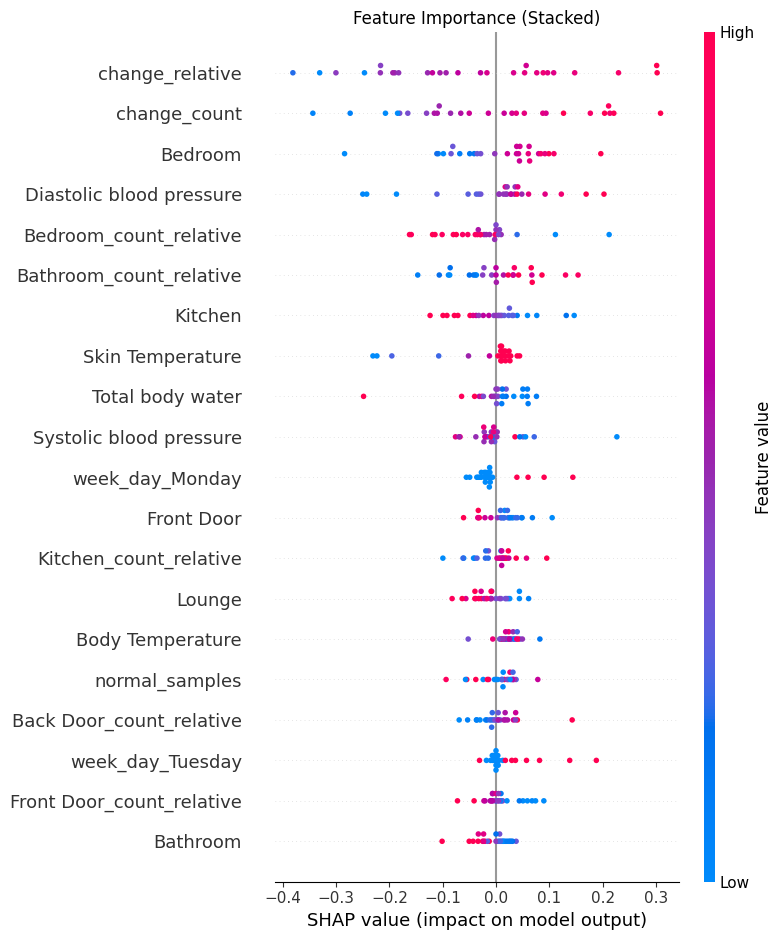

    feature  importance  cumulative_importance
0        10    0.159959               0.131102
1         9    0.141324               0.246931
2        15    0.076616               0.309726
3        30    0.072104               0.368822
4        23    0.056780               0.415359
5        25    0.055179               0.460583
6        13    0.047347               0.499389
7        35    0.044229               0.535639
8        34    0.034500               0.563915
9        29    0.034278               0.592009
10        1    0.030947               0.617373
11       14    0.030248               0.642164
12       21    0.028872               0.665827
13       18    0.028212               0.688950
14       28    0.028195               0.712059
15       11    0.027810               0.734852
16       24    0.025387               0.755660
17        5    0.024634               0.775849
18       22    0.024555               0.795975
19       17    0.023374               0.815132
20       33  

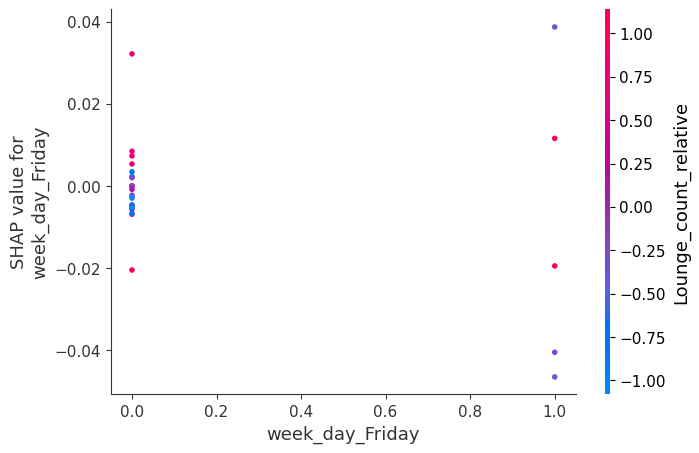

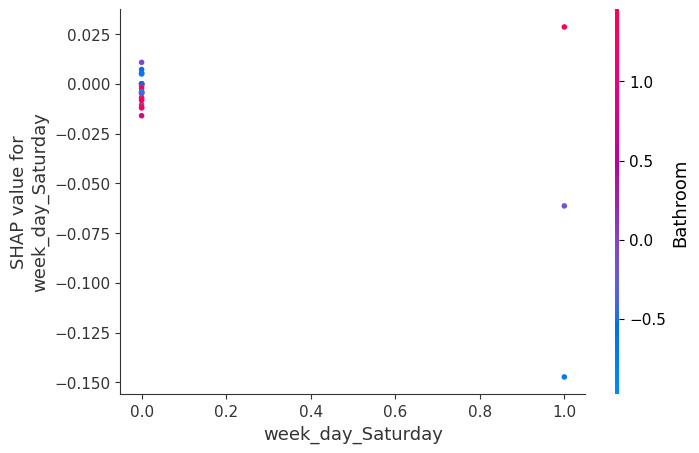

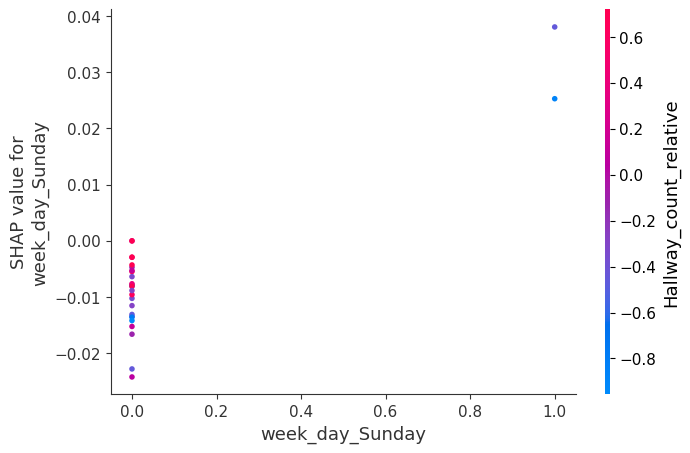

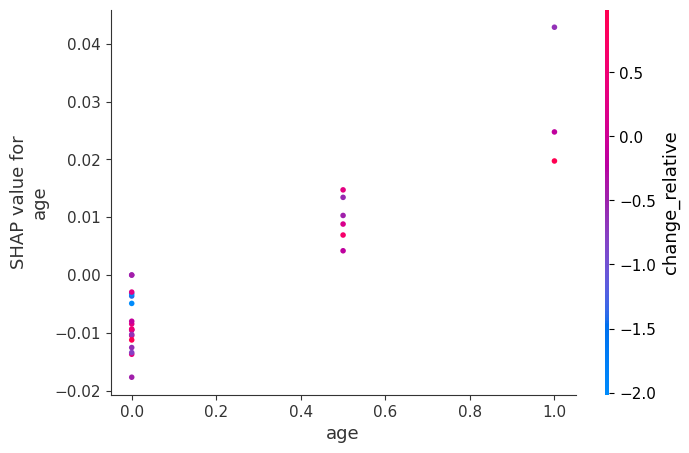

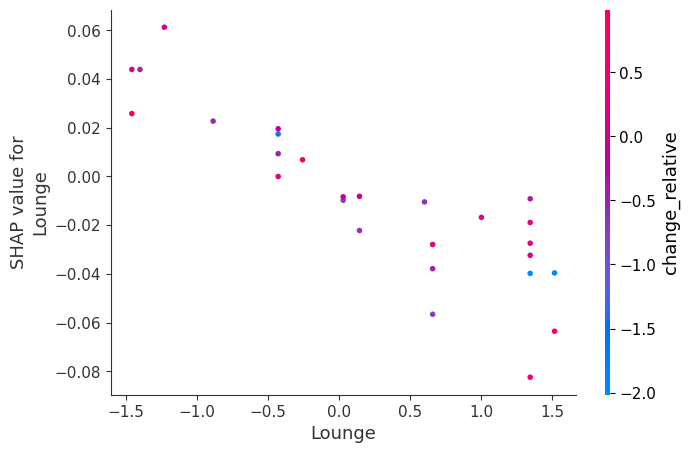

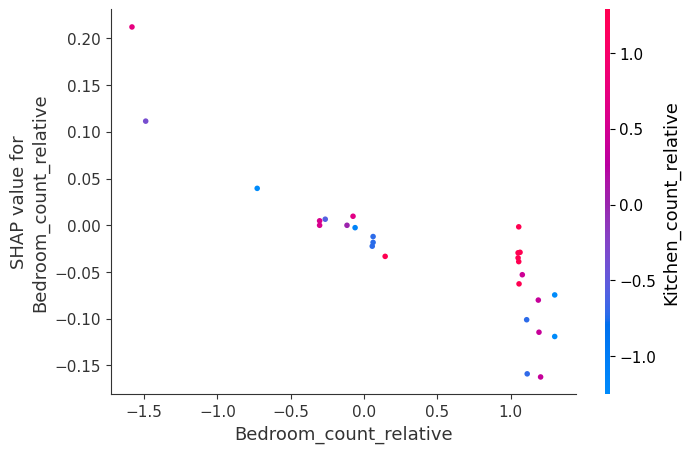

ValueError: All arrays must be of the same length

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import shap

# Generate synthetic dataset
np.random.seed(42)

# Define and train the MLP model
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate PR AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_curve, precision_curve)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"PR AUC: {pr_auc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute SHAP values
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Create a single figure for visualizing feature importance
plt.figure(figsize=(10, 6))

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
plt.title('Feature Importance (Stacked)')

plt.tight_layout()
plt.show()

# Calculate cumulative importance of features
shap_values_mean = np.mean(np.abs(shap_values), axis=0)  # mean absolute SHAP values
feature_importance = pd.DataFrame({'feature': range(X_train.shape[1]), 'importance': shap_values_mean})
feature_importance = feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum() / feature_importance['importance'].sum()

# Display feature importance and cumulative importance
print(feature_importance)

# Identify negative impact features
negative_impact_features = [i for i in range(X_train.shape[1]) if (shap_values[:, i] < 0).mean() > 0.5]
print("\nFeatures with negative impact:", X_columns[negative_impact_features])

# Check correlation with target
correlation = pd.DataFrame(X_train).corrwith(pd.Series(y_train))
harmful_features = [feature for feature in negative_impact_features if correlation[feature] < 0]
print("\nHarmful features:", X_columns[harmful_features])

# Create dependence plots for harmful features
for feature in harmful_features:
    shap.dependence_plot(feature, shap_values, X_test)

shap_results = {'name':name,'accuracy':accuracy, 'f1':f1,'precision':precision,'Recall':sensitivity, 'specificity':specificity,
                'pr_auc':pr_auc,'roc_auc':roc_auc,  'harmul_features':X_columns[harmful_features],
                'negative_impact_features':  X_columns[negative_impact_features]}
save_to_csv(shap_results,'/content/drive/MyDrive/datasets/shap_results.csv')


In [ ]:

shap_results = {'name':name,
    'accuracy': accuracy, 'f1': f1, 'precision': precision, 'Recall': sensitivity,
    'specificity': specificity, 'pr_auc': pr_auc, 'roc_auc': roc_auc,
    'harmful_features': X_columns[harmful_features],
    'negative_impact_features': X_columns[negative_impact_features]
}
save_to_csv(shap_results,'/content/drive/MyDrive/datasets/shap_results.csv')

In [ ]:
shap_results

{'name': 'global+tm0.03',
 'accuracy': 0.5925925925925926,
 'f1': 0.56,
 'precision': 0.5833333333333334,
 'Recall': 0.5384615384615384,
 'specificity': 0.6428571428571429,
 'pr_auc': 0.6720085470085471,
 'roc_auc': 0.5906593406593406,
 'harmful_features': Index(['week_day_Friday', 'week_day_Saturday', 'week_day_Sunday', 'age',
        'Lounge', 'Bedroom_count_relative'],
       dtype='object'),
 'negative_impact_features': Index(['week_day_Friday', 'week_day_Monday', 'week_day_Saturday',
        'week_day_Sunday', 'week_day_Thursday', 'age', 'change_count',
        'change_relative', 'Lounge', 'Bedroom_count_relative',
        'Hallway_count_relative', 'Systolic blood pressure', 'Heart rate'],
       dtype='object')}

In [ ]:
shap_results

{'name': 'global+tm0.03',
 'accuracy': 0.5925925925925926,
 'f1': 0.56,
 'precision': 0.5833333333333334,
 'Recall': 0.5384615384615384,
 'specificity': 0.6428571428571429,
 'pr_auc': 0.6720085470085471,
 'roc_auc': 0.5906593406593406,
 'harmul_features': Index(['week_day_Friday', 'week_day_Saturday', 'week_day_Sunday', 'age',
        'Lounge', 'Bedroom_count_relative'],
       dtype='object'),
 'negative_impact_features': Index(['week_day_Friday', 'week_day_Monday', 'week_day_Saturday',
        'week_day_Sunday', 'week_day_Thursday', 'age', 'change_count',
        'change_relative', 'Lounge', 'Bedroom_count_relative',
        'Hallway_count_relative', 'Systolic blood pressure', 'Heart rate'],
       dtype='object')}

Accuracy: 0.59
F1 Score: 0.56
Precision: 0.58
Sensitivity (Recall): 0.54
Specificity: 0.64
PR AUC: 0.67
ROC AUC: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.58      0.54      0.56        13

    accuracy                           0.59        27
   macro avg       0.59      0.59      0.59        27
weighted avg       0.59      0.59      0.59        27



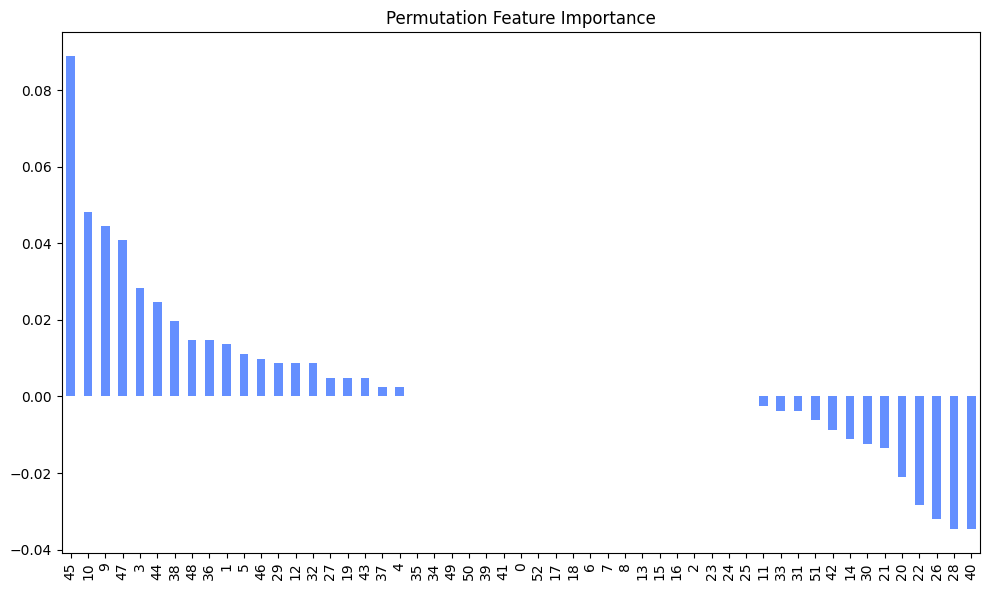

    feature    importance  cumulative_importance
0        45  8.888889e-02               0.461538
1        10  4.814815e-02               0.711538
2         9  4.444444e-02               0.942308
3        47  4.074074e-02               1.153846
4         3  2.839506e-02               1.301282
5        44  2.469136e-02               1.429487
6        38  1.975309e-02               1.532051
7        48  1.481481e-02               1.608974
8        36  1.481481e-02               1.685897
9         1  1.358025e-02               1.756410
10        5  1.111111e-02               1.814103
11       46  9.876543e-03               1.865385
12       29  8.641975e-03               1.910256
13       12  8.641975e-03               1.955128
14       32  8.641975e-03               2.000000
15       27  4.938272e-03               2.025641
16       19  4.938272e-03               2.051282
17       43  4.938272e-03               2.076923
18       37  2.469136e-03               2.089744
19        4  2.46913

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.inspection import permutation_importance
name = f'global+tm{threshold+removed}'
# Generate synthetic dataset
np.random.seed(42)

# Define and train the MLP model
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate PR AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_curve, precision_curve)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"PR AUC: {pr_auc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute Permutation Feature Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a single figure for visualizing feature importance
plt.figure(figsize=(10, 6))

# Plot summary of feature importance
feature_importance = pd.Series(perm_importance.importances_mean, index=range(X_train.shape[1]))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Permutation Feature Importance')

plt.tight_layout()
plt.show()

# Calculate cumulative importance of features
feature_importance = pd.DataFrame({'feature': range(X_train.shape[1]), 'importance': perm_importance.importances_mean})
feature_importance = feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum() / feature_importance['importance'].sum()

# Display feature importance and cumulative importance
print(feature_importance)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import lime
import lime.lime_tabular

seed = 42
np.random.seed(seed)


X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_val, y_val = X_val.to_numpy(), y_val.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

# Define and train the MLP model
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=seed)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate PR AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_curve, precision_curve)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"PR AUC: {pr_auc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=[f'Feature {i}' for i in range(X_train.shape[1])], class_names=['Class 0', 'Class 1'], discretize_continuous=True)

# Explain a single instance
i = 0  # Index of the instance you want to explain
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=n_features)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)


Accuracy: 0.59
F1 Score: 0.56
Precision: 0.58
Sensitivity (Recall): 0.54
Specificity: 0.64
PR AUC: 0.67
ROC AUC: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.58      0.54      0.56        13

    accuracy                           0.59        27
   macro avg       0.59      0.59      0.59        27
weighted avg       0.59      0.59      0.59        27



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

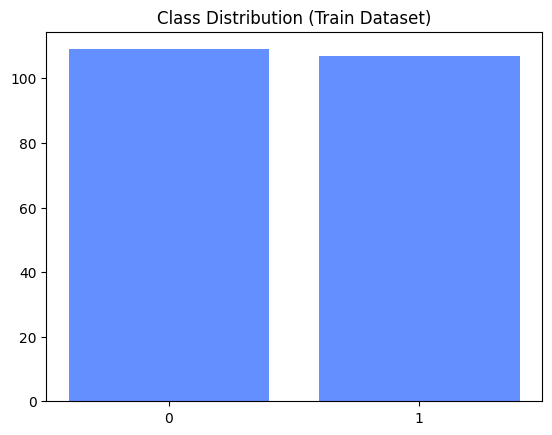

In [ ]:
count_one = np.sum(y_train)
count_zero = len(y_train) - count_one
plt.bar(['0', '1'], [count_zero, count_one])
plt.title('Class Distribution (Train Dataset)')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

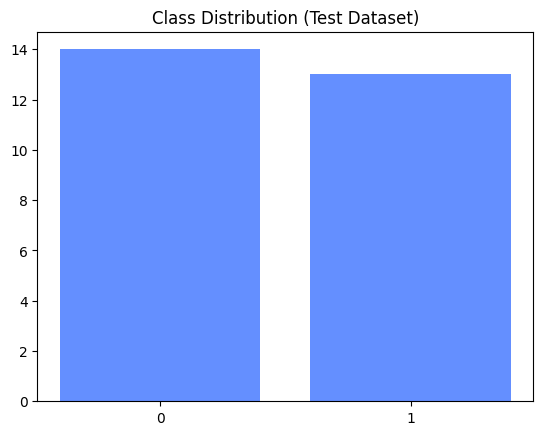

In [ ]:
count_one = np.sum(y_test)
count_zero = len(y_test) - count_one
plt.bar(['0', '1'], [count_zero, count_one])
plt.title('Class Distribution (Test Dataset)')
plt